# Выявление профилей потребления покупателей интернет магазина для дома и быта

# Выявление профилей потребления покупателей интернет магазина для дома и быта

[Ссылка на презентацию в формате PDF]( https://drive.google.com/file/d/1d1467dkYall3sv_GZD45eDKfVFvzhZQW/view?usp=sharing)

[Ссылка дашборд](https://public.tableau.com/app/profile/.33912041/viz/Book3_16895037442360/Dashboard1)

В данной работе нужно сегментировать покупателей по профилю потребления(разбить покупателей на кластеры). Разбить товары по категориям. Составить подробные рекомендации заказчику по кластерам пользователей. Клиентам какого
кластера, когда и какие категории товара рассылать в рекламных предложениях.   Как и для какого кластера можно попытаться увеличить количество продаваемого товара, повысить возвращаемость покупателей.

Для этого:
- Проведем предобрабоку данных,
- Разобьём товары на категории,
- Сегментируем покупателей на основе истории их покупок при помощи RFT анализа, или метода kMeans , или используем иной вариант разделения на кластеры(),
- Сформулируем и проверьте статистические гипотезы, подтвердим корректность сегментации,
- Проведем исследовательский анализ данных.
Подготовим выводы и рекомендации

Будем использовать дата сет ecom_dataset_upd.csv

Данные которыми распологаем в дата сете:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

## Импорт библиотек и загрузка данных.¶

In [ ]:
#импортируем библиотеки для дальнейшей работы
import pandas as pd# импортируем библиотеку пандас
import numpy as np#импортируем библиотеку numpy
import matplotlib.pyplot as plt#импортируем библиотеку matplotlib
from scipy import stats as st#импортируем библиотеку scipy
import plotly.graph_objects as go
import datetime as dt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

In [ ]:
#считываем и сохраняем датафрейм (ДФ)
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
data = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}")

In [ ]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


## Предобработка данных

In [ ]:
#получим общие информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


- Имеет 6 колонок данных и 7474 строки данных
- Видим что, столбец date имеет не правильный формат, нужно привести его к формату datetime.
- Так же видим, что все столбцы имеют 7474 записи, значит пропусков данных нет. Работать с заполнением или удалением не надо.
- Названия столбцов корректное

In [ ]:
#приводим столбец 'date' к формату datetime
try:
    data['date'] =pd.to_datetime(data['date'],format='%Y%m%d%H')
    print('Ok datetime64')
except:
    print('Not Ok datetime64')

Ok datetime64


In [ ]:
#просматриваем результат преобразования
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


In [ ]:
#просматриваем результат преобразования
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [ ]:
print("Количество явных дубликатов:", data.duplicated().sum())

Количество явных дубликатов: 0


In [ ]:
print("Количество не явных дубликатов по customer_id, order_id, product, quantity:",\
data.duplicated(subset=['customer_id','order_id','product', 'quantity']).sum())

Количество не явных дубликатов по customer_id, order_id, product, quantity: 1866


In [ ]:
#запишем количество строк в ДФ до начала его подготовки к работе
len0 = data.shape[0]
print('Количество строк в ДФ до начала его подготовки к работе',len0)

Количество строк в ДФ до начала его подготовки к работе 7474


In [ ]:
#запишем дубликаты
duplicates = data.duplicated(subset=['customer_id','order_id','product', 'quantity'], keep=False)
# Отображение оригинальных записей и их дубликатов
originals_and_duplicates = data.loc[duplicates].sort_values(by=['customer_id','order_id','product', 'quantity'])
print("Просмотр дубликатов по customer_id, order_id, product, quantity :", originals_and_duplicates)

Выходные данные были обрезаны до нескольких последних строк (5000).
4691 2019-06-06 08:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4804 2019-06-07 16:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4847 2019-06-07 22:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4877 2019-06-08 08:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4200 2019-05-31 22:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4518 2019-06-04 18:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4547 2019-06-04 19:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4692 2019-06-06 08:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4805 2019-06-07 16:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4848 2019-06-07 22:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4878 2019-06-08 08:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4201 2019-05-31 22:00:00  db77c238-3c80-4032-9e3c-c30a43f4a650     14835   
4519 2019-06-04 18:0

Часть не явных дубликатов сформировалась благодаря данным в столбце date, есть заказы с разницей в часах и разницей в днях, но с абсолютно одинковым покупателем, номером заказа, товаром и его количеством. Это неявные дубликаты их нужно удалить, вероятно они сформировались благодаря выгрузке данных из разних систем учета заказов или отображения разных шагов заказа от его принятия до отгрузки.

In [ ]:
#удаление неявных дубликатов без создания нового ДФ
data.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity'], inplace=True)
#обновляем индексы в порядке возрастания
data.reset_index(drop=True, inplace=True)
#проверяем
print("Количество не явных дубликатов по customer_id, order_id, product, quantity:",\
data.duplicated(subset=['customer_id','order_id','product', 'quantity']).sum())

Количество не явных дубликатов по customer_id, order_id, product, quantity: 0


In [ ]:
#Подстраховываемся от неявных дубликатов в названии товаров
data['product'] = data['product'].str.lower()#убираем заглавные буквы в названиях
data['product'] = data['product'].str.replace('ё','е', regex=True) #меняем в названиях ё на е
#data['product'] = data['product'].str.replace('(', '', regex=True) #удаляем (
#data['product'] = data['product'].str.replace(')', '', regex=True) #удаляем )
data['product'] = data['product'].str.replace(',', '', regex=True) #удаляем ,

In [ ]:
#Проверяем еще раз на наличие неявных дубликатов из-за изменений в названии товаров
print("Количество не явных дубликатов по customer_id, order_id, product, quantity:",\
data.duplicated(subset=['customer_id','order_id','product', 'quantity']).sum())

Количество не явных дубликатов по customer_id, order_id, product, quantity: 0


In [ ]:
#Проверяем на наличие заказов совершенных более чем одним покупателем.
print("Количество не явных дубликатов по customer_id, order_id, product, quantity:",\
data.duplicated(subset=['order_id','product', 'quantity']).sum())

Количество не явных дубликатов по customer_id, order_id, product, quantity: 34


In [ ]:
#запишем дубликаты
duplicates = data.duplicated(subset=['order_id','product', 'quantity'], keep=False)
# Отображение оригинальных записей и их дубликатов
originals_and_duplicates = data.loc[duplicates].sort_values(by=['order_id','product', 'quantity'])
print("Просмотр дубликатов по order_id, product, quantity :", originals_and_duplicates)

Просмотр дубликатов по order_id, product, quantity :                     date                           customer_id  order_id  \
3858 2019-06-21 22:00:00  4e861452-b692-48dc-b756-99a130b7a70a     14872   
3862 2019-06-24 09:00:00  9897ccd6-9441-4886-b709-b06361fabf6c     14872   
3859 2019-06-21 22:00:00  4e861452-b692-48dc-b756-99a130b7a70a     14872   
3863 2019-06-24 09:00:00  9897ccd6-9441-4886-b709-b06361fabf6c     14872   
3860 2019-06-21 22:00:00  4e861452-b692-48dc-b756-99a130b7a70a     14872   
3864 2019-06-24 09:00:00  9897ccd6-9441-4886-b709-b06361fabf6c     14872   
458  2018-10-28 22:00:00  0b5ce2c7-acef-4a9a-b821-61a44ed05557     68785   
470  2018-10-30 21:00:00  c1dd5c0e-51db-4a5d-91a3-5374cb20043d     68785   
1011 2018-12-10 12:00:00  2f955596-4b13-432e-93f3-6433395aafe6     69283   
1016 2018-12-10 16:00:00  e3805ccd-2d64-4d0e-92dd-902293555c35     69283   
1032 2018-12-11 21:00:00  954172a5-634c-4a50-941d-9db6d15a7377     69310   
1435 2019-02-03 22:00:00  845d52ce-

Есть 34 дублика с одинаковыми order_id, 'product', 'quantity', но разними 'customer_id', вероятно это какой-то сбой при загрузке или объединении данных

In [ ]:
#удаление неявных дубликатов заказов совершенных более чем одним покупателем
data.drop_duplicates(subset=['order_id', 'product', 'quantity'], inplace=True)
#обновляем индексы в порядке возрастания
data.reset_index(drop=True, inplace=True)

In [ ]:
#Проверяем еще раз на наличие заказов совершенных более чем одним покупателем.
print("Количество не явных дубликатов по customer_id, order_id, product, quantity:",\
data.duplicated(subset=['order_id','product', 'quantity']).sum())

Количество не явных дубликатов по customer_id, order_id, product, quantity: 0


In [ ]:
print("Дата фрейм уменьшился на",round((1-(data.shape[0]/len0))*100,1),'% в результате удаления явных и неявных дубликатов')
print("Начальная дата анализируемого периода:",data['date'].min())
print("Финальная дата анализируемого периода:",data['date'].max())
print("Продолжительность анализируемого периода:",data['date'].max()-data['date'].min())
print("Количество уникальных заказов:",data['order_id'].nunique())
print("Количество уникальных клиентов:",data['customer_id'].nunique())
print("Количество уникальных товаров:",data['product'].nunique())

Дата фрейм уменьшился на 25.4 % в результате удаления явных и неявных дубликатов
Начальная дата анализируемого периода: 2018-10-01 00:00:00
Финальная дата анализируемого периода: 2020-01-31 15:00:00
Продолжительность анализируемого периода: 487 days 15:00:00
Количество уникальных заказов: 3521
Количество уникальных клиентов: 2431
Количество уникальных товаров: 2338


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5574 non-null   datetime64[ns]
 1   customer_id  5574 non-null   object        
 2   order_id     5574 non-null   int64         
 3   product      5574 non-null   object        
 4   quantity     5574 non-null   int64         
 5   price        5574 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 261.4+ KB


- В результате предобработки данных из-за неявных дубликатов были удалены 25,4% строк ДФ;
- Колонке date приведена к формату datetime и корректно тотображается дата;
- Для дальнейшей работы имеем ДФ с 5574 строками и 6 столцами;
- Пропусков в данных не обнаружено;
- Начальная дата анализируемого периода: 2018-10-01 00:00:00;
- Финальная дата анализируемого периода: 2020-01-31 15:00:00;
- Продолжительность анализируемого периода: 487 days 15:00:00;
- Количество уникальных заказов: 3521;
- Количество уникальных клиентов: 2431;
- Количество уникальных товаров: 2338

## Исследовательский анализ данных

### Изучение аномальных значений

In [ ]:
# Устанавливаем максимальное количество строк вывода данных
pd.set_option('display.max_rows', None)
# Устанавливаем максимальное количество столбцов вывода данных
pd.set_option('display.max_columns', None)
# Устанавливаем максимальное количество символов в столбце для отображения
pd.set_option('max_colwidth', 200)

In [ ]:
#Получаем общую информацию о данных
data.describe().T

,count,mean,min,25%,50%,75%,max,std
date,5574,2019-05-05 02:54:39.655543552,2018-10-01 00:00:00,2019-01-29 13:45:00,2019-04-28 17:00:00,2019-07-28 09:00:00,2020-01-31 15:00:00,NaN
order_id,5574.0,55915.54503,12624.0,14812.5,69202.5,71930.75,112789.0,32443.131687
quantity,5574.0,2.589164,1.0,1.0,1.0,1.0,1000.0,16.44547
price,5574.0,530.534102,9.0,90.0,150.0,524.0,14917.0,972.976955


- 75 процентов товаров в заказах имеют 1 позицию. НАличие 1000 позиций в заказе скорее говорит о выбросе данных
- 75 процентов товара имеют цену ниже 524 д.е.(денежных единиц) .Цена за один товар находится в диапазоне от 9 д.е. до 14917 д.е.

Посмотрим сколько процентов приходится на выбросы данных

In [ ]:
print("Процент выбросов данных по количеству товара в заказе:", round((data.query('quantity > 1')\
.shape[0]/data.shape[0])*100,1))# узнаем долю стоимости приходится на выбросы данных
print("Процент выбросов данных по стоимости товара:",round((data.query('price > 524')\
.shape[0]/data.shape[0])*100,1))# узнаем долю стоимости приходится на выбросы данных

Процент выбросов данных по количеству товара в заказе: 20.1
Процент выбросов данных по стоимости товара: 24.8


Аномальных значений больше 10% и в первом и во втором случае, значит просто удалить выбросы более 75% . Значит выделим самые аномальные значения с помощью визуализии.

In [ ]:
#Посмотрим эти данные на отдельных диаграммах размаха
fig = px.box(data, y='quantity', title='Количество товара в заказе')
fig.update_layout(yaxis_title='Количество товара в заказе')
fig.show()

In [ ]:
#уменьшаем количество заказов в товаре до мах 100 для отображения
fig = px.box(data, y='quantity', title='Количество товара в заказе')
fig.update_layout(yaxis_title='Количество товара в заказе', yaxis_range=[0, 100])
fig.show()

In [ ]:
#строим диаграмму с усами для цены товара
fig = px.box(data, y='price', title='Цена товара в заказе')
fig.update_layout(yaxis_title='Цена товара в заказе')
fig.show()

Визуально тоже не очень помогло определиться , какие выбросы лучше удалить.

Посмотрим ТОП 5 по количеству покупок и ТОП-5 по стоимости

In [ ]:
data.sort_values(by='quantity',ascending=True).tail()

,date,customer_id,order_id,product,quantity,price
484,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0
1013,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,ручка-скоба рс-100 белая *трибатрон* 1108035,200,29.0
3371,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0
3749,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3816,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000,1000,675.0


Последнее значение количества товаров в заказе выше предыдущих в три раза. Посмотрим сколько раз продавался этот товар и каким количеством.

In [ ]:
#посмотрим сколько раз данный товар продавался в расмтриваемом периоде
data.query('product=="вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000"')

,date,customer_id,order_id,product,quantity,price
3816,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000,1000,675.0


Данный товар продавался один раз в количестве 1000 штук. Удалим данное значений как явный выброс. Остальные значения из ТОП-5 оставим

In [ ]:
data.drop(index=data.query('quantity>350').index,inplace=True)# удаляем выброс в количестве продаж

In [ ]:
data.sort_values(by='price',ascending=True).tail()

,date,customer_id,order_id,product,quantity,price
5536,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,сумка-тележка хозяйственная rolser mnb019 rojo logic dos+2 красная,1,8077.0
2545,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,сумка-тележка хозяйственная rolser mnb019 rojo logic dos+2 красная,1,8077.0
1693,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,сумка-тележка хозяйственная andersen alu star shopper hava синяя 115-103-90,1,8437.0
2293,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,сумка-тележка хозяйственная andersen royal shopper hera синяя 166-004-90,1,8737.0
4192,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917.0


In [ ]:
#посмотрим сколько раз данный товар продавался в расмтриваемом периоде
data.query('product=="сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая"')

,date,customer_id,order_id,product,quantity,price
4192,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917.0


Данный товар продавался один раз за весь наблюдаемый период, по остальным товарам из ТОП-5 видно , что были не однократные продажи. Не станем ничего удалять, так как стоимость товара может быть разная.

In [ ]:
#сформируем столбец total в котором отобразим стоимость покупки указанного в quantity количества товаров
data['total'] = data['quantity']*data['price']
data.pivot_table(index = 'order_id', values = 'total', aggfunc = 'sum').sort_values(by='total').tail()

,total
order_id,
68878,24370.0
69504,32718.0
69156,33680.0
69830,47385.0
71668,49432.0


In [ ]:
data.query('order_id in [68878, 69504, 69156, 69830, 71668]')

,date,customer_id,order_id,product,quantity,price,total
570,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",5,4874.0,24370.0
895,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,кухонные ножницы webber из нержавеющей стали с орехоколом ве-5208,2,127.0,254.0
896,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457.0,29248.0
897,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,"нож кухонный для мяса с пластмассовой ручкой 305 х 175 мм ""русская линия"" (нх-36м) метиз 1519003",6,127.0,762.0
898,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,"нож кухонный для овощей с деревянной ручкой 318 х 200 мм ""гурман"" (нх-14м) метиз 1519009",3,142.0,426.0
899,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,"нож кухонный универсальный с пластмассовой ручкой 285 х 150 мм ""русская линия"" (нх-38м) метиз 1519022",24,119.0,2856.0
900,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,рыбочистка с деревянной ручкой с ножом 1518024,2,67.0,134.0
1134,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,57,574.0,32718.0
1297,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27,1755.0,47385.0
3749,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,49432.0


Просмотрев 5 самых больших чеков в ДФ , считаю, что удалять их не надо. Они представляют уникальные ситуации, которые могут быть интересными или важными для анализа. Удаление этих данных, повлияет на ТОП-5 товаров в продажах и выручке.

### Разбиваем товары по категориям

Создадим словарь, где ключами являются названия товаров, а значениями - категории. Затем создадим новый столбец в датафрейме, в котором будет указана категория каждого товара на основе словаря сопоставления.

In [ ]:
print("Количество уникальных названий товара:", data['product'].nunique(),'шт')

Количество уникальных названий товара: 2337 шт


In [ ]:
#сформируем столбец catalog в котором отразим первые 3 слова из названия товара для упрощения формирования категорий
data['catalog'] = data['product'].apply(lambda x: ' '.join(x.split()[:3]))
data = data.sort_values(by=['catalog'])#сортируем по столбцу catalog
data.head()

,date,customer_id,order_id,product,quantity,price,total,catalog
5567,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,2399.0,tepмокружка avex freeflow
2054,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,2399.0,tepмокружка avex freeflow
4296,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,tepмокружка avex freeflow 700 мл сталь avex0776,1,2399.0,2399.0,tepмокружка avex freeflow
1559,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,tepмокружка avex recharge 500 мл голубой avex0681,1,1874.0,1874.0,tepмокружка avex recharge
242,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,tepмокружка avex recharge 500 мл голубой avex0681,1,2324.0,2324.0,tepмокружка avex recharge


In [ ]:
data['product'] = data['product'].str.replace('t','т', regex=True) #меняем в названиях t на т русское

В ручную формируем список ключевых слов для отнесения товара к определнной категории. Вносим ключевое слово в список, затем запускаем функцию распределения товаров по разделам каталога, после этого проверяем сколько товаров без категории(с этими товарами делаем все тоже самое с начала). И так, пока список товаров без категорий не останется пуст. Категории будем добавлять по мере необходимости.

In [ ]:
dacha = ['хоста','цикламен','цинерария','шалфей','эхинацея','эшшольция','ясколка','тюльпан','укроп','физостегия','флокс','фуксия','хризантема','цинния','энотера','тележк','табак','сумка-тележка','на колесах','солидаго','смолевка','скиммия','рудбекия','осина','томат','пеларгон','корыт', 'маттиол', 'монард','настурц','незабудк','ромашк','овсянниц','огурец','растение','кампанул','колокольчик','кореопсис','кориандр ','космея','котовник','крокус','лапчатк','лен','лилейник','лобелия','любисток','многолетн','морков','диффенбахия', 'импатиенс', 'калатея','календул','калибрахоа','калла','калоцефалус','каллун','камнеломк','капсикум','капуст','кипарис','клен','клубник','петрушк','петун','платикодон', 'пиретрум','подсолнечник','ранункулус','роза','рукол','седум','тимьян','георгин','годец','виноград','дендробиум','джункус','драцен','душиц','дыня','ель','зверобой','земляник','змееголовник','иссоп','кабачок','каланхое','вербейник','вербена','вероника', 'виола','вигна','гайлардия','гвоздика','гиацинт','гимнокалициум','черенок','гипсофила','горох','рассада','азалия','аквилегия','алиссум','альбука', 'амариллис','анемона','антуриум','арбуз','артемизия','астра','афеляндра','бадан','базилик','баклажан','бакопа','бархатцы','барвинок','бегония','буддлея','бузульник','валериана'  ]
house = ['ткань универсальн','подставк','rozenbal','почтов','увлажняющая маска','d-14','d-11','скребок','для ролика','сметка с','d-21','термометр','для кафеля','урна','фен','фоторам','чистящ','совок','светиль','сушилка','таз','простын', 'подголовн','покрыв','d-15','d-23','пылесос','для чистки','для унитаза','пуф','для окон','наматра','окномойка','плед','плечик','кашпо','чехол','подрукавник','для обуви','подушк','полк','d-5','халат','наволоч','скраб','швабр','d-12','одеял','отжим','муляж','d-20','полотен','d-7','искусственн','искуственн','комод','корзинк','кофе арабика','кофр','крассула','в горшке','лаватера','обувн','лоток','d-9','d-17','d-13','d-10','калатея','карниз алюминиевый','карниз для ванной','ключниц','ковер','коврик','штор','комнатн','ванн','корзин','короб','хранен','ваза','вешал','домашн','гербера','комнатн','концентрированный гель','постел','декоративная коробка','зубная', 'измельчит','замиокулькас','мыло','ерш', 'туалетн','декабрист','гортензия','глоксиния','гладил','глажен','щетка','алоэ вера','адиантум','антинакипин','аптения','ароматизированное средство','аспарагус','бель','бальзамин', 'прищеп','бензин','бидон','вантуз','ведр','веник','весы','вешал','вкладыши','гардения']
kitchen = ['торт','половник','терка','термос','толкушк','выпечк','хлебниц','чайн','штопор','тарелк','кондитерс','кружек','посуд','перчатки резиновые','для яйца','пресс','противен','пьезозажигалк','сахарн','сито','скалк','соковарк','выжимал','сотейник','засор','для деликатной','бокал','фужер','форм для','салатн','нож','овоще','орехок','латексн','чистка','столов','стакан','салфет','миксер','сковород','миск','кипятильник','котел','кухонн','мантоварка','лопатка','чайная','столовая','кухонн','кувшин','венчик', 'губка','дозатор для мыла','разделочн','свч','соус','соль','защитный экран','картофелемялка','кастрюл','кисточк','контейнер','мытья','кружк','антижир','банка','блюд','блюдц','бульонниц','вакуумный пакет','вилк','скатерть']
build = ['шнур хозяйственный','для пробки','фал','фиксатор','уголок','сварка','шило','шпингалет','штангенциркуль','перчатки','полиров','инструмент','линейк','петл','вентиляцион','скоба','сверл','стремян','стяжк','завертка форточная','ванна','петля приварная','сверел','веревка полипропиленовая','ковш пластмассовый','крепеж','крючок','лестниц','напильник']

In [ ]:
def product_class(product):#объявляем функцию с именем product_class, которая принимает аргумент product
    for i in kitchen:#перебирая элементы списка kitchen
        if i in product:#если элемент из списка kitchen есть в названии продукта
            return 'товары для кухни'#если ключевое слово найдено, возвращаем 'товары для кухни'
    for i in house:
        if i in product:
            return 'товары для дома'
    for i in dacha:
        if i in product:
            return 'товары для дачи'
    for i in build:
        if i in product:
            return 'товары для строительства'
    return 'нет категории'

In [ ]:
#формируем столбец с категориями использую функцию product_class передавая ей названия товаров
data['product_categ'] = data['product'].apply(product_class)

In [ ]:
#выводим на экран список не распределенных по категориям товаров
print(data.query('product_categ == "нет данных о категории"')['catalog'])

Series([], Name: catalog, dtype: object)


In [ ]:
#смотрим сколько товаров без категории
print("Количество товаров без категории:", len(data.query('product_categ == "нет категории"')))

Количество товаров без категории: 0


In [ ]:
#удаляем не нужный нам теперь столбец catalog
data = data.drop('catalog', axis=1)

In [ ]:
#построим круговую диаграммму распределения наименований товаров по категориям
graf = data.groupby('product_categ')['product'].nunique().sort_values(ascending=False)
fig = px.pie(names=graf.index, values=graf, title='Распределение наименований товаров по категориям',
            width=800, height=600)
fig.show()

- Категория "товары для дома" содержит 1183 уникальных наименования товаров;
- Категория "товары для дачи" содержит 693 уникальных наименования товаров;
- Категория "товары для кухни" содержит 391 уникальное наименование товара;
- Категория "товары для строительства" содержит 69 уникальных наименований товаров.

Таким образом, на основе предоставленных данных можно сделать вывод, что категория "товары для дома" имеет наибольшее количество уникальных наименований товаров, в то время как категория "товары для строительства" содержит наименьшее количество уникальных наименований товаров.

### Cегментируем покупателей на основе истории их покупок RFM анализом

In [ ]:
#Для проведения RFM анализа нам понядобиться общая сумма покупок клиента
#сформируем столбец total в котором отобразим стоимость покупки указанного в quantity количества товаров
data['total'] = data['quantity']*data['price']

In [ ]:
#за дату проведения анализа примем последнюю дату в ДФ
NOW = dt.datetime(2020,1,31)
# Вычисление RFM-метрик/cруппируем данные по уникальному идентификатору покупателя
df_rfm = data.groupby('customer_id').agg({
    'date': lambda x: (NOW - x.max()).days,#вычисляем разницу между текущей датой и ближайшей датой покупки
    'order_id': 'nunique',#подсчитываем количество уникальных заказов для каждого покупателя
    'total': 'sum' #суммируем общую стоимость покупок для каждого покупателя
})
# переименуем столбцы
df_rfm.rename(columns={'date': 'recency', 'order_id': 'frequency', 'total': 'monetary'}, inplace=True)
df_rfm = df_rfm.sort_values(by='monetary')#отсортируем
df_rfm.tail()

,recency,frequency,monetary
customer_id,,,
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,286,4,41900.0
146cd9bf-a95c-4afb-915b-5f6684b17444,233,1,49432.0
58a4c3cc-504f-43ea-a74a-bae19e665552,380,2,53232.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,463,35,57278.0
c971fb21-d54c-4134-938f-16b62ee86d3b,330,126,159508.0


In [ ]:
# Разделение на квантили
quantiles = df_rfm.quantile(q=[0.33, 0.66])
quantiles

,recency,frequency,monetary
0.33,104.0,1.0,524.00
0.66,299.0,2.0,1326.14


In [ ]:
# Функция для категоризации по квантилям
def rfm_segment(x, p, d, f):
    if x <= quantiles[p][0.33]:
        return 'Low'
    elif x <= quantiles[p][0.66]:
        return 'Medium'
    else:
        return 'High'

In [ ]:
# Применение функции для каждой RFM-метрики
df_rfm['R'] = df_rfm['recency'].apply(rfm_segment, args=('recency', 'd', 'f'))
df_rfm['F'] = df_rfm['frequency'].apply(rfm_segment, args=('frequency', 'r', 'm'))
df_rfm['M'] = df_rfm['monetary'].apply(rfm_segment, args=('monetary', 'r', 'f'))
df_rfm.head()

,recency,frequency,monetary,R,F,M
customer_id,,,,,,
2330d859-e9cb-4c8f-abd0-55f9e27e6745,443,1,15.0,High,Low,Low
da6f7bf7-f699-4046-a4dd-cab0c27debcb,181,1,22.0,Medium,Low,Low
10f79846-2640-4c43-8392-4e76ff5455ef,102,1,22.0,Low,Low,Low
f34611ba-b488-4a88-8d6b-f59a05970fc1,130,1,22.0,Medium,Low,Low
2b6439c9-1ae1-4785-9509-ca4348b3d39a,276,1,22.0,Medium,Low,Low


In [ ]:
# Сегментация покупателей
df_rfm['RFM_segment'] = df_rfm['R'] + df_rfm['F'] + df_rfm['M']
df_rfm.head()

,recency,frequency,monetary,R,F,M,RFM_segment
customer_id,,,,,,,
2330d859-e9cb-4c8f-abd0-55f9e27e6745,443,1,15.0,High,Low,Low,HighLowLow
da6f7bf7-f699-4046-a4dd-cab0c27debcb,181,1,22.0,Medium,Low,Low,MediumLowLow
10f79846-2640-4c43-8392-4e76ff5455ef,102,1,22.0,Low,Low,Low,LowLowLow
f34611ba-b488-4a88-8d6b-f59a05970fc1,130,1,22.0,Medium,Low,Low,MediumLowLow
2b6439c9-1ae1-4785-9509-ca4348b3d39a,276,1,22.0,Medium,Low,Low,MediumLowLow


In [ ]:
# разбили покупателей на 3 категории согласно их ценности давности покупки/количествав покупок/суммы покупок.
segment_map = {'LowLowLow': 'Сегмент 1',
    'LowLowMedium': 'Сегмент 1',
    'LowLowHigh': 'Сегмент 1',
    'LowMediumLow': 'Сегмент 1',
    'LowMediumMedium': 'Сегмент 2',
    'LowMediumHigh': 'Сегмент 2',
    'LowHighLow': 'Сегмент 2',
    'LowHighMedium': 'Сегмент 3',
    'LowHighHigh': 'Сегмент 3',
    'MediumLowLow': 'Сегмент 1',
    'MediumLowMedium': 'Сегмент 1',
    'MediumLowHigh': 'Сегмент 2',
    'MediumMediumLow': 'Сегмент 2',
    'MediumMediumMedium': 'Сегмент 2',
    'MediumMediumHigh': 'Сегмент 3',
    'MediumHighLow': 'Сегмент 1',
    'MediumHighMedium': 'Сегмент 3',
    'MediumHighHigh': 'Сегмент 3',
    'HighLowLow': 'Сегмент 1',
    'HighLowMedium': 'Сегмент 1',
    'HighLowHigh': 'Сегмент 3',
    'HighMediumLow': 'Сегмент 2',
    'HighMediumMedium': 'Сегмент 2',
    'HighMediumHigh': 'Сегмент 3',
    'HighHighLow': 'Сегмент 2',
    'HighHighMedium': 'Сегмент 3',
    'HighHighHigh': 'Сегмент 3'
}

При объединении категорий я стремился к  логическому разделению покупателей на три сегмента, учитывая их относительное положение в каждой из трех метрик. Например, сегменты с низкими значениями recency, frequency и monetary объединены в один сегмент, тогда как сегменты с высокими значениями объединены в другой сегмент

In [ ]:
df_rfm['segment'] = df_rfm['RFM_segment'].map(segment_map)
# Просмотр результатов
df_rfm.head()

,recency,frequency,monetary,R,F,M,RFM_segment,segment
customer_id,,,,,,,,
2330d859-e9cb-4c8f-abd0-55f9e27e6745,443,1,15.0,High,Low,Low,HighLowLow,Сегмент 1
da6f7bf7-f699-4046-a4dd-cab0c27debcb,181,1,22.0,Medium,Low,Low,MediumLowLow,Сегмент 1
10f79846-2640-4c43-8392-4e76ff5455ef,102,1,22.0,Low,Low,Low,LowLowLow,Сегмент 1
f34611ba-b488-4a88-8d6b-f59a05970fc1,130,1,22.0,Medium,Low,Low,MediumLowLow,Сегмент 1
2b6439c9-1ae1-4785-9509-ca4348b3d39a,276,1,22.0,Medium,Low,Low,MediumLowLow,Сегмент 1


In [ ]:
#проверим, все ли строки заплнены в столбце Segment
df_rfm['segment'].unique()

array(['Сегмент 1', 'Сегмент 2', 'Сегмент 3'], dtype=object)

In [ ]:
# передаем категорию покупателя в общий ДФ
data_fin = data.merge(df_rfm[['segment']], how='left', left_on='customer_id', right_index=True)
# посмотрим результат
data_fin.head()

,date,customer_id,order_id,product,quantity,price,total,product_categ,segment
5567,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,тepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,2399.0,товары для кухни,Сегмент 2
2054,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,тepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,2399.0,товары для кухни,Сегмент 2
4296,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,тepмокружка avex freeflow 700 мл сталь avex0776,1,2399.0,2399.0,товары для кухни,Сегмент 2
1559,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,тepмокружка avex recharge 500 мл голубой avex0681,1,1874.0,1874.0,товары для кухни,Сегмент 3
242,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,тepмокружка avex recharge 500 мл голубой avex0681,1,2324.0,2324.0,товары для кухни,Сегмент 3


Сегментация покупателей проведена с помощью RFM анализа. Выделено 3 группы, для более удобной последующей работы.
- Сегмент 1: В этот сегмент входят покупатели, совершающие покупки редко, в небольшом количестве и с низкими суммами. Они могут быть характеризованы низкой активностью и низкой ценностью для нас как клиенты.
- Сегмент 2: В этот сегмент входят покупатели, которые делают покупки в среднем количестве и средними суммами. Они имеют умеренную активность в покупках и среднюю ценность для нас как клиенты.
- Сегмент 3: В этот сегмент входят покупатели, совершающие покупки часто, в большом количестве и с высокими суммами. Они проявляют высокую активность в покупках и имеют высокую ценность для нас как клиенты.

## Проверка гипотез

Для проверки гипотез используем U-тест Манна-Уитни. Он позволяет определить, существует ли статистически значимая разница между распределениями двух независимых выборок.
- Различие кластеров по выручке от продаж
- Различие кластеров по количеству купленных товаров

### Гипотеза о различие выручки от продаж у разных кластеров покупателей

Нулевая гипотеза H0: Нет статистически значимых различий в объёме продаж между сегментами покупателей.

Альтернативная гипотеза H1: Есть статистически значимое различие в объёме продаж между сегментами покупателей.

In [ ]:
# Генерируем три независимые выборки.
cluster1 = data_fin.query("segment == 'Сегмент 1'")['total']
cluster2 = data_fin.query("segment == 'Сегмент 2'")['total']
cluster3 = data_fin.query("segment == 'Сегмент 3'")['total']

In [ ]:
# Оценим дисперсию по выборке
print(f"Дисперсия 1-го кластера: {np.var(cluster1, ddof=1)} ")
print(f"Дисперсия 2-го кластера: {np.var(cluster2, ddof=1)} ")
print(f"Дисперсия 3-го кластера: {np.var(cluster3, ddof=1)} ")
print(f"Соотношение дисперсий 1-го и 2-го кластера: {np.var(cluster2, ddof=1)/(np.var(cluster1, ddof=1))} ")
print(f"Соотношение дисперсий 2-го и 3-го кластера: {np.var(cluster3, ddof=1)/(np.var(cluster2, ddof=1))} ")

Дисперсия 1-го кластера: 144049.5911501836 
Дисперсия 2-го кластера: 3094548.9466360006 
Дисперсия 3-го кластера: 6170730.115822756 
Соотношение дисперсий 1-го и 2-го кластера: 21.482525024383285 
Соотношение дисперсий 2-го и 3-го кластера: 1.9940644734447608 


- Соотношение дисперсий 1-го и 2-го кластера равно 17.272709761671177, что указывает на значительное различие в дисперсии между этими двумя кластерами.
- Соотношение дисперсий 2-го и 3-го кластера равно 2.093734361109182, что указывает на меньшее различие в дисперсии между этими двуми кластерами по сравнению с предыдущим соотношением.
- Разброс значений объемов продаж внутри кластеров различается. Более высокие значения дисперсии указывают на большую вариабельность данных внутри кластеров. Это может быть связано с разными характеристиками и поведением покупателей в разных сегментах, что влияет на разброс объемов продаж внутри этих сегментов.

In [ ]:
# Выполним проверку гипотезы с другими кластерами
alpha = 0.05 # критический уровень статистической значимости
num_hypotheses = 3 # количество пар гипотез
alpha_corrected = alpha / num_hypotheses

results = stats.mannwhitneyu(cluster1, cluster2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha_corrected):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.215517336751703e-35
Отвергаем нулевую гипотезу


При установленном критическом уровне статистической значимости (alpha_corrected = 0.0167), мы отвергаем нулевую гипотезу.

Это говорит о статистически значимых различиях между объемами продаж в первом и втором кластерах. То есть, есть основания считать, что эти два кластера имеют разные уровни продаж.


In [ ]:
# Выполним проверку гипотезы с другими кластерами
alpha = 0.05 # критический уровень статистической значимости
results = stats.mannwhitneyu(cluster2, cluster3)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha_corrected):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0007794657246525435
Отвергаем нулевую гипотезу


Это говорит о статистически значимых различиях между группами, на которые были разделены данные. Вероятность получить такие или еще большие различия между группами случайно очень мала.

Таким образом, результаты указывают на наличие статистически значимых различий между 2 и 3 группами. В контексте конкретной задачи, это может означать, что существуют значимые различия в отношении изучаемой переменной.

In [ ]:
# Выполним проверку гипотезы с другими кластерами
alpha = 0.05 # критический уровень статистической значимости

results = stats.mannwhitneyu(cluster1, cluster3)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha_corrected):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.6686152156237677e-47
Отвергаем нулевую гипотезу


Между 3 и 1 группой тоже есть статистически значимые различия по выручке от продаж.

ВЫВОД: между 1,2,3 кластерами есть статистически значимые различия по выручке от продаж.

### Гипотеза о разном количества купленных товаров покупателями различных кластеров

Нулевая гипотеза H0: Нет статистически значимых различий в количестве купленных товаров между сегментами покупателей.

Альтернативная гипотеза H1: Есть статистически значимое различие в количестве купленных товаров между сегментами покупателей.

In [ ]:
# Генерируем три независимые выборки.
cluster1 = data_fin.query("segment == 'Сегмент 1'")['quantity']
cluster2 = data_fin.query("segment == 'Сегмент 2'")['quantity']
cluster3 = data_fin.query("segment == 'Сегмент 3'")['quantity']

In [ ]:
# Оценим дисперсию по выборке
print(f"Дисперсия 1-го кластера: {np.var(cluster1, ddof=1)} ")
print(f"Дисперсия 2-го кластера: {np.var(cluster2, ddof=1)} ")
print(f"Дисперсия 3-го кластера: {np.var(cluster3, ddof=1)} ")
print(f"Соотношение дисперсий 1-го и 2-го кластера: {np.var(cluster2, ddof=1)/(np.var(cluster1, ddof=1))} ")
print(f"Соотношение дисперсий 2-го и 3-го кластера: {np.var(cluster3, ddof=1)/(np.var(cluster2, ddof=1))} ")

Дисперсия 1-го кластера: 15.909935718363695 
Дисперсия 2-го кластера: 114.47923332860171 
Дисперсия 3-го кластера: 184.67123004953416 
Соотношение дисперсий 1-го и 2-го кластера: 7.195455428299849 
Соотношение дисперсий 2-го и 3-го кластера: 1.6131417435287414 


- Дисперсия количества продаж в 1-м кластере составляет 16.27, во 2-м кластере - 115.08, а в 3-м кластере - 184.53. Это означает, что разброс значений количества продаж наибольший в 3-м кластере, затем во 2-м кластере, и наименьший - в 1-м кластере.
- Соотношение дисперсий между 2-м и 1-м кластерами составляет 7.07, что указывает на то, что разброс количества продаж во 2-м кластере примерно в 7 раз больше, чем в 1-м кластере.
- Соотношение дисперсий между 3-м и 2-м кластерами составляет 1.60, что говорит о том, что разброс количества продаж в 3-м кластере примерно в 1.6 раза больше, чем во 2-м кластере.

In [ ]:
# Выполним проверку гипотезы с другими кластерами
alpha = 0.05 # критический уровень статистической значимости
results = stats.mannwhitneyu(cluster1, cluster2)
num_hypotheses = 3 # количество пар гипотез
alpha_corrected = alpha / num_hypotheses

print('p-значение:', results.pvalue)

if (results.pvalue < alpha_corrected):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.5264457245073645e-13
Отвергаем нулевую гипотезу


Между 1 и 2 кластером есть статистически значимые различиях в количестве купленного товара

In [ ]:
# Выполним проверку гипотезы с другими кластерами
alpha = 0.05 # критический уровень статистической значимости
results = stats.mannwhitneyu(cluster1, cluster3)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha_corrected):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0009300248593595734
Отвергаем нулевую гипотезу


Между 1 и 3 кластером есть статистически значимые различиях в количестве купленного товара

In [ ]:
# Выполним проверку гипотезы с другими кластерами
alpha = 0.05 # критический уровень статистической значимости
results = stats.mannwhitneyu(cluster2, cluster3)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha_corrected):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.3379678551566577e-21
Отвергаем нулевую гипотезу


Между 2 и 3 кластером есть статистически значимые различиях в количестве купленного товара

Гипотеза о разном количества купленных товаров покупателями различных кластеров подтверждена.


### Динамика выручки за исследуемы период

In [ ]:
# для проведения дальнейшего исследования нам понадобятся столбцы
#с часом дня, полной датой, днем недели, номером недели, месяц и год.
data_fin['hour'] = data_fin['date'].dt.hour
data_fin['day'] = data_fin['date'].dt.date
data_fin['week_day'] = (data_fin['date'].dt.dayofweek) + 1
data_fin['week'] = data_fin['date'].dt.isocalendar().week
data_fin['month'] = data_fin['date'].dt.month
data_fin['year'] = data_fin['date'].dt.year
data_fin.head()

,date,customer_id,order_id,product,quantity,price,total,product_categ,segment,hour,day,week_day,week,month,year
5567,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,тepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,2399.0,товары для кухни,Сегмент 2,17,2020-01-29,3,5,1,2020
2054,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,тepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,2399.0,товары для кухни,Сегмент 2,14,2019-03-21,4,12,3,2019
4296,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,тepмокружка avex freeflow 700 мл сталь avex0776,1,2399.0,2399.0,товары для кухни,Сегмент 2,2,2019-08-16,5,33,8,2019
1559,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,тepмокружка avex recharge 500 мл голубой avex0681,1,1874.0,1874.0,товары для кухни,Сегмент 3,22,2019-02-13,3,7,2,2019
242,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,тepмокружка avex recharge 500 мл голубой avex0681,1,2324.0,2324.0,товары для кухни,Сегмент 3,9,2018-10-15,1,42,10,2018


#### Выручка по месяцам

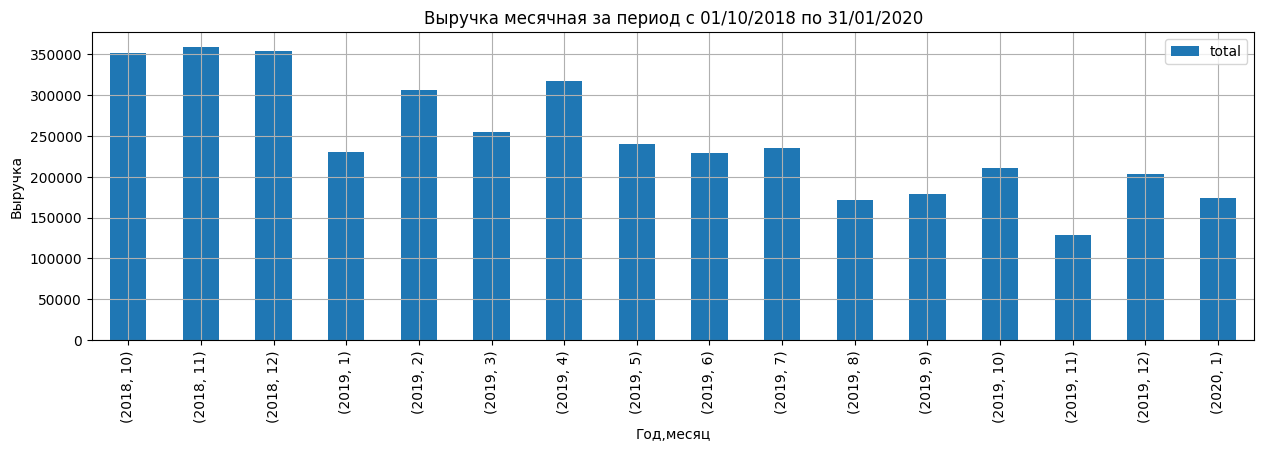

In [ ]:
#построим график ежемесячной выручки за период
data_fin.pivot_table(index = (['year', 'month']), values = 'total', aggfunc = 'sum').plot(y ='total', kind = 'bar',\
figsize=(15,4), grid=True, title = 'Выручка месячная за период с 01/10/2018 по 31/01/2020');#строим график выручки по годам
plt.xlabel('Год,месяц')
plt.ylabel('Выручка')
plt.show()

- Среднемесячная выручка за период постепенно уменьшается.
- В последних месяцах 2018 года (октябрь-декабрь) среднемесячная выручка была достаточно стабильной и колебалась в районе 350 000-360 000.
- В январе 2019 года среднемесячная выручка снизилась и составила 235 432.
- В феврале 2019 года выручка возросла и достигла 307 996.
- В дальнейшем в течение 2019 года среднемесячная выручка имела переменную динамику и колебалась от 220 000 до 318 000.
- В начале 2020 года (январь) среднемесячная выручка составила 174 036.
- В феврале и апреле выручка была несколько выше, чем в  соседних месяцах, возможно покупались какие-то сезонные товары.

#### Выручка по месяцам по категориям товара

In [ ]:
# создажим сводную таблицу выручки по месяцам в разрезе категорий товаров
pivot_table = data_fin.pivot_table(index=['year', 'month'], columns='product_categ', values='total', aggfunc='sum')
# создадим список с месяцами в формате 'год-месяц'
months = [f'{year}-{month:02d}' for year, month in pivot_table.index]
# Построение графика
fig = go.Figure()
for column in pivot_table.columns:
    fig.add_trace(go.Bar(x=months, y=pivot_table[column], name=column))
fig.update_layout(
    title='Ежемесячная выручка по категориям товаров за период с 01/10/2018 по 31/01/2020',
    xaxis_title='Год, месяц',
    yaxis_title='Выручка',
    width=900,
    height=500,
    barmode='stack'
)
fig.show()

- Категория "товары для дома" имеет наибольшую выручку почти во всех месяцах. Это указывает на то, что товары для дома являются основными и наиболее востребованными товарами.
- Категория "товары для дачи" также показывает значительную выручку в нескольких месяцах, особенно в начале и конце сезона дачных работ.
- Категории "товары для кухни" и "товары для строительства" обычно имеют меньшую выручку по сравнению с предыдущими категориями, но наблюдаются некоторые пики в отдельных месяцах.
- Категории "товары для дачи" и "товары для строительства" обычно показывают наибольшую выручку в месяцах с апреля по сентябрь, что связано с сезонностью дачных работ и строительных проектов. В зимние месяцы выручка в этих категориях снижается.
- Категории "товары для дома" и "товары для кухни" имеют более стабильную выручку без явно выраженных сезонных колебаний. Они показывают относительно стабильные результаты в течение года.

#### Выручка по неделям

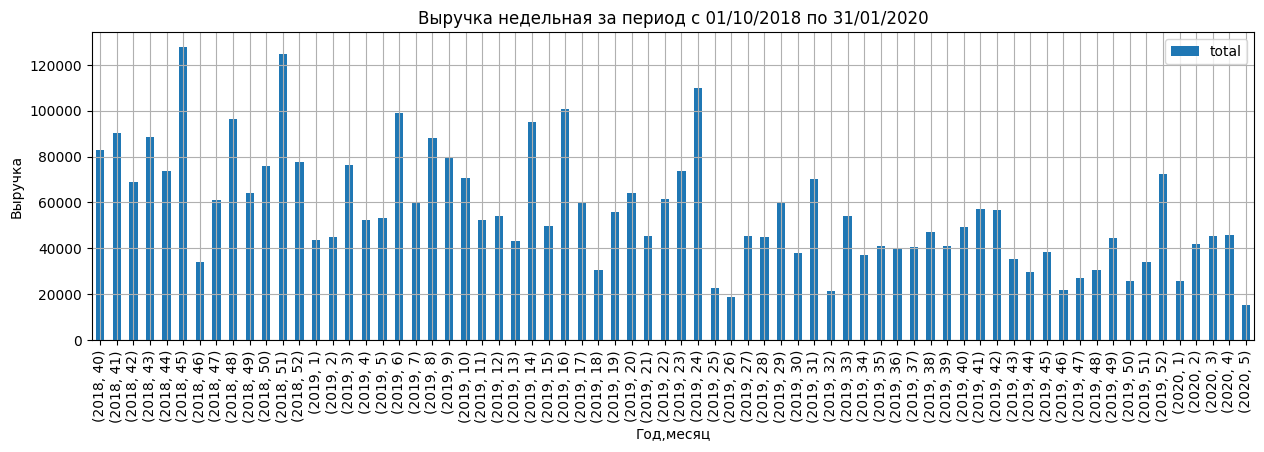

In [ ]:
#Построим график еженедельной выручки за период
data_fin.pivot_table(index = (['year', 'week']), values = 'total', aggfunc = 'sum').plot(y ='total', kind = 'bar',\
figsize=(15,4), grid=True, title = 'Выручка недельная за период с 01/10/2018 по 31/01/2020');#строим график выручки по годам
plt.xlabel('Год,месяц')
plt.ylabel('Выручка')
plt.show()

- Выручка в наблюдаемом периоде уменьшается от начала к концу периода.
- Выручка имеет сезонные колебания: в начале и конце года обычно наблюдается повышенный спрос и выручка выше, а в середине года выручка может снижаться.
- В 2018 году выручка была стабильной в течение большей части года, с некоторыми колебаниями в некоторых неделях.
- В 2019 году выручка показывала разнонаправленную динамику в разные периоды года: были недели с высокой выручкой, а также недели с низкой выручкой.
- В 2020 году выручка в начале года была относительно стабильной, но в последующие недели наблюдалось снижение выручки.
- Некоторые недели в году выделяются особенно высокой или низкой выручкой, что может быть связано с сезонными факторами, праздниками или специфическими событиями.

#### Ежедневная выручка

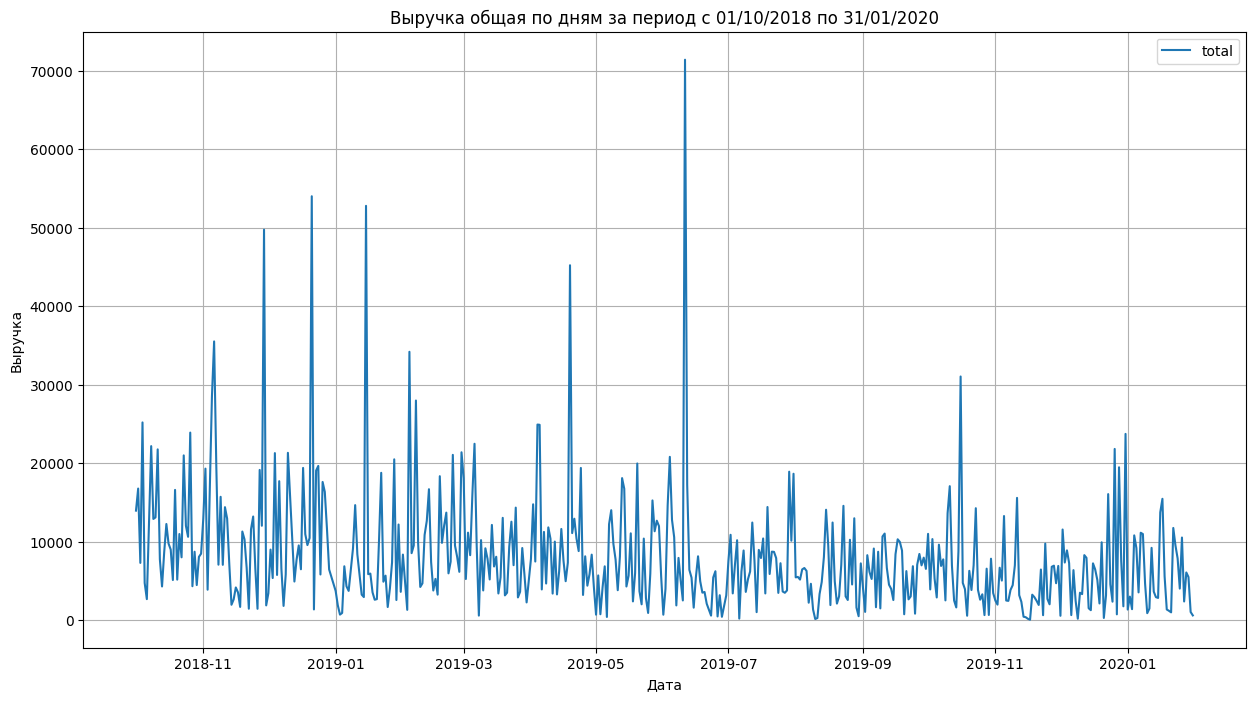

In [ ]:
#построим график выручки по дням за период
data_fin.pivot_table(index='day', values='total', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Выручка общая по дням за период с 01/10/2018 по 31/01/2020')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

- Выручка имеет значительные колебания изо дня в день. Некоторые дни показывают высокие значения выручки, тогда как другие дни - низкие. Это может быть связано с различными факторами, такими как сезонность, праздничные дни или акции и специальные предложения.
- Наблюдается некоторая сезонность в выручке. В некоторых периодах, например, в конце 2018 года и начале 2019 года, выручка показывает рост, а затем снижается. Это может быть связано с покупательскими тенденциями, изменением предложений или другими факторами, влияющими на спрос.
- В целом, дневная выручка подвержена колебаниям и зависит от различных факторов, и для лучшего понимания необходимо провести более подробный анализ данных и контекста.
- Общая динамика дневной выручки также демонстрирует постепенное снижение

#### Ежедневная выручка по категориям товара

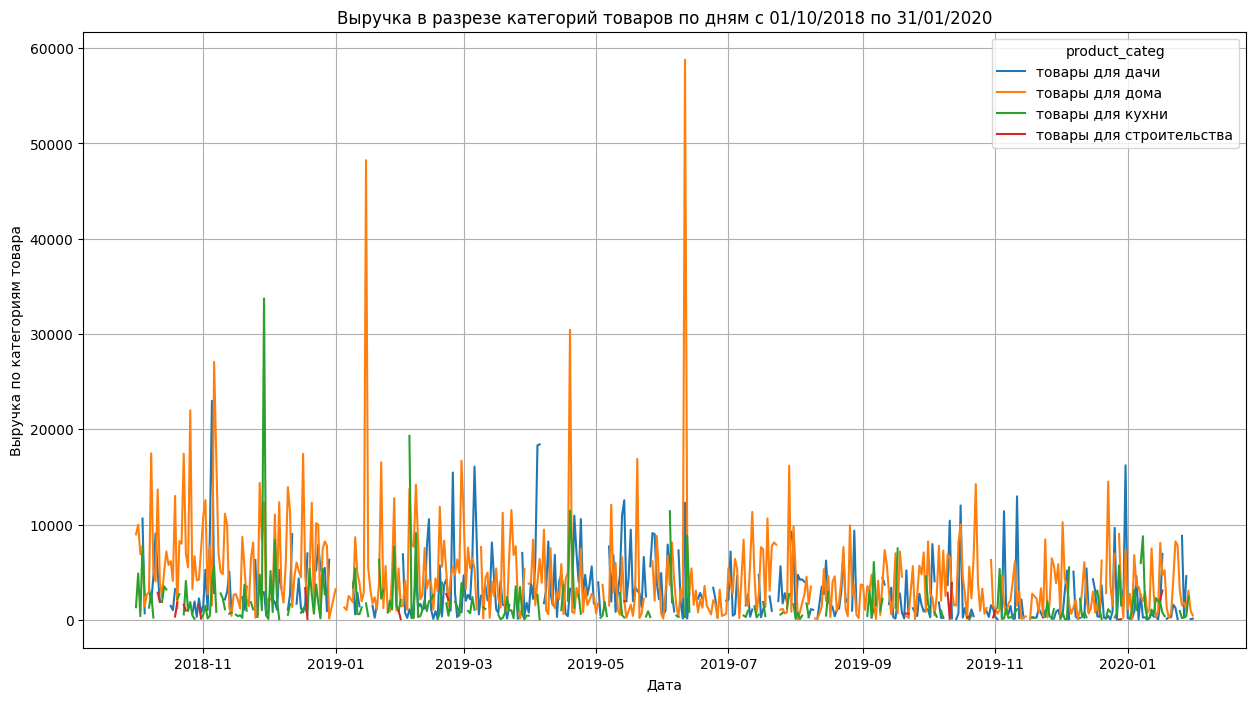

In [ ]:
#построим график выручки по дням в разрезе категорий товаров за период
data_fin.pivot_table(index='day', columns = 'product_categ', values='total', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Выручка в разрезе категорий товаров по дням с 01/10/2018 по 31/01/2020')
plt.xlabel('Дата')
plt.ylabel('Выручка по категориям товара')
plt.show()

- Товары для дачи: Выручка в этой категории не показывает явных тенденций роста или падения. Иногда наблюдается увеличение выручки (например, 2018-10-04 с выручкой 10632.0), но в целом она остается стабильной.
- Товары для дома: Выручка в этой категории в целом снижается к концу периода. Начиная с 2018-10-29, выручка в этой категории снижается или остается на относительно низком уровне.
- Товары для кухни: Выручка в этой категории также показывает снижение к концу периода, хотя есть некоторые дни, когда она растет (например, 2018-10-02 с выручкой 4863.0).
- Товары для строительства: В этой категории также наблюдается снижение выручки к концу периода. Однако, на протяжении всего периода, эта категория имеет одни из самых высоких значений выручки.

Категории товаров для дома, товаров для кухни и товаров для строительства показывают снижение выручки к концу периода. Нет явных тенденций роста выручки в категории товаров для дачи.

#### Выручка общая по категориям товара

In [ ]:
# Группировка данных по категориям товаров и вычисление суммарной выручки
revenue_by_category = data_fin.groupby('product_categ')['total'].sum().reset_index()
# Построение графика выручки в разрезе категорий товаров
fig = px.bar(revenue_by_category, x='product_categ', y='total',
             title='Выручка в разрезе категорий товаров с 01/10/2018 по 31/01/2020',
             labels={'product_categ': 'Категория товара', 'total': 'Выручка'},
             width=800, height=600)
fig.show()

Выручка в рассмтриваемом периоде по категориям:
Товары для дачи: 1 164 702 д.е.
Самая большая выручка у катеорииТовары для дома: 2 104 154 д.е.
Товары для кухни: 524 593 д.е.
Товары для строительства: 165 154д.е.

#### Выручка по по дням недели

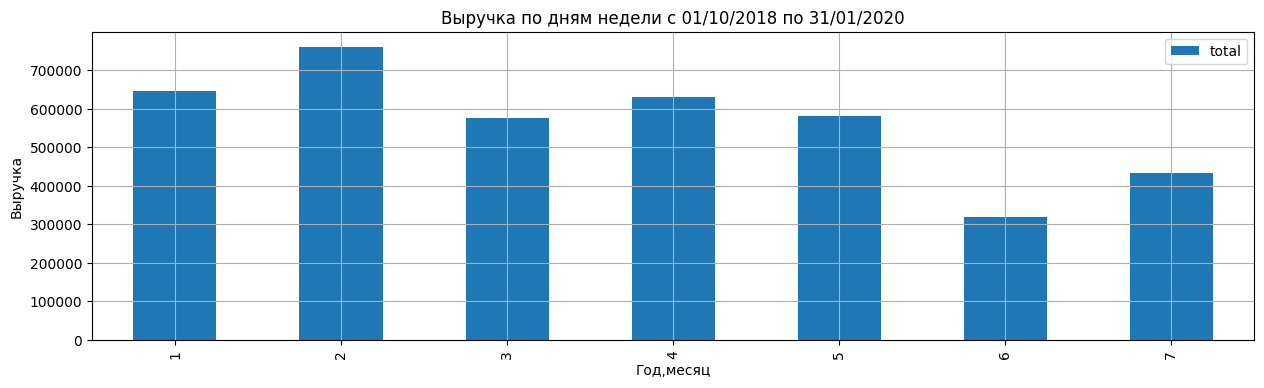

In [ ]:
#посмотрим как распределяется выруска по дням недели
data_fin.pivot_table(index = (['week_day']), values = 'total', aggfunc = 'sum').plot(y ='total', kind = 'bar',\
figsize=(15,4), grid=True, title = 'Выручка по дням недели с 01/10/2018 по 31/01/2020');#строим график выручки по годам
plt.xlabel('Год,месяц')
plt.ylabel('Выручка')
plt.show()

- Наибольшая выручка была достигнута во вторник (день 2) с общей суммой 762,187.50 д.е.. Это может указывать на повышенный спрос на товары в середине недели.
- Выручка в понедельник (день 1) и четверг (день 4) также оказалась значительной, составляя соответственно 642,013.67 и 632,687.83 д.е.. Это может указывать на стабильный спрос в начале и середине недели.
- В пятницу (день 5) и воскресенье (день 7) наблюдается небольшое снижение выручки по сравнению с остальными днями недели. Это может быть связано с тем, что в эти дни потребители склонны заниматься другими делами или проводить время с семьей.
- Наименьшая выручка была зафиксирована в субботу (день 6) с общей суммой 322,960.00 д.е.. Это может указывать на уменьшенную активность покупателей в этот день недели.

### Среднемесячный чек за период

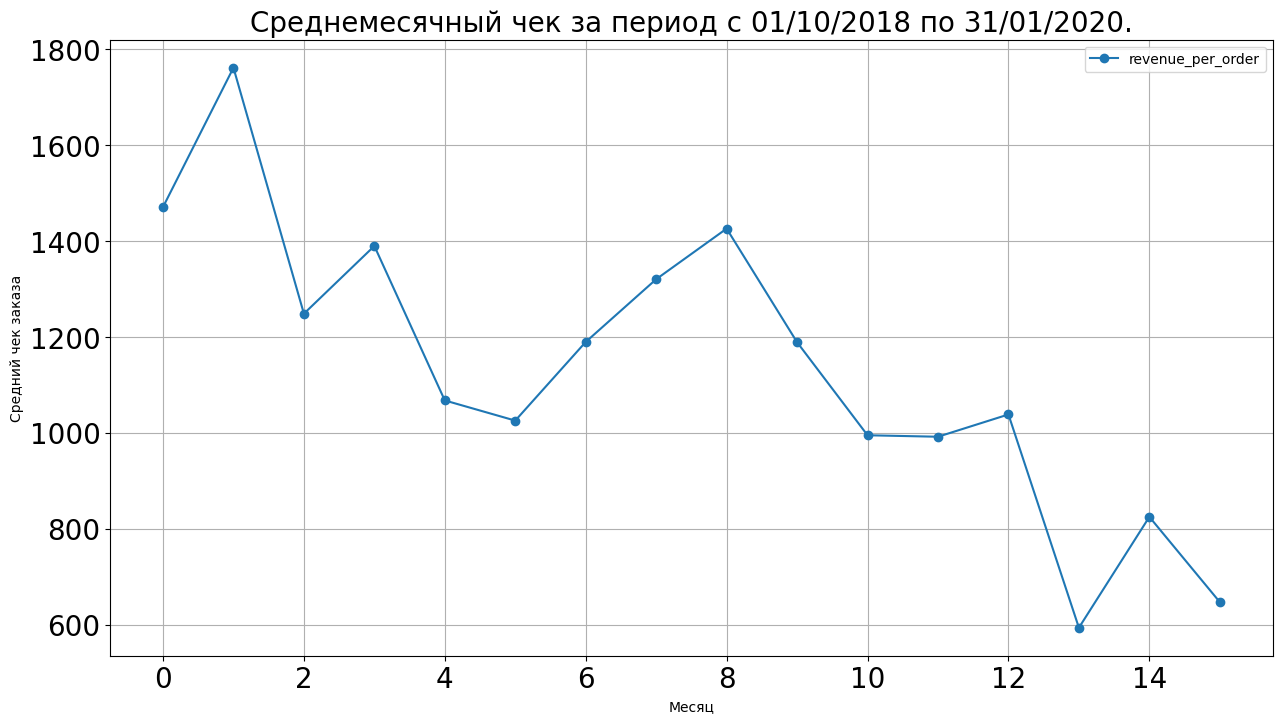

In [ ]:
# Найдём средний чек покупателя revenue_per_customer — разделим показатель revenue на customer_id.
avg_check = data_fin.groupby(['year','month']) \
            .agg({'total':'sum','customer_id':'nunique', 'order_id':'nunique'}).reset_index()
avg_check.columns = ['year', 'month', 'total', 'customers', 'orders'] # переименуем столбцы
avg_check['revenue_per_customer'] = avg_check['total'] / avg_check['customers']

# Найдём средний чек заказов revenue_per_order — разделим показатель revenue на orders.
avg_check['revenue_per_order'] = avg_check['total'] / avg_check['orders']
avg_check = avg_check.sort_values(['year','month'])

avg_check.plot(marker='o', y=['revenue_per_order'], figsize=(15,8), grid=True, fontsize=20)
plt.title('Среднемесячный чек за период с 01/10/2018 по 31/01/2020.', fontsize=20)
plt.xlabel('Месяц')
plt.ylabel('Средний чек заказа')
plt.show()

- Средний чек варьируется в зависимости от года и месяца. Например, в ноябре 2019 года средний чек составлял 1,073.42 д.е., в то время как в январе 2020 года он снизился до 646.98 единицы валюты. Это может указывать на сезонные тенденции или изменения в предпочтениях покупателей.
- В целом, средний чек колеблется в диапазоне от 593.51 до 2,018.81 д.е.. Это может быть связано с различными факторами, включая сезонность, акции и специальные предложения.
- Средний чек варьируется от месяца к месяцу. Например, в октябре 2018 года средний чек составлял 1,472.43 д.е., а в январе 2019 года он был равен 1,409.77 д.е.. Это может указывать на изменения в потребительском поведении или на эффективность маркетинговых кампаний.
- В течении наблюдаемого периода отмечается постепенное снижение среднемесячного чека.

### Количество покупателей

#### Количество покупателей в день

In [ ]:
# Посчитаем общее кол-во уникальных заказов.
print("Всего заказов с 01/10/2018 по 31/01/2020:  ",data_fin['order_id'].nunique())

Всего заказов с 01/10/2018 по 31/01/2020:   3520


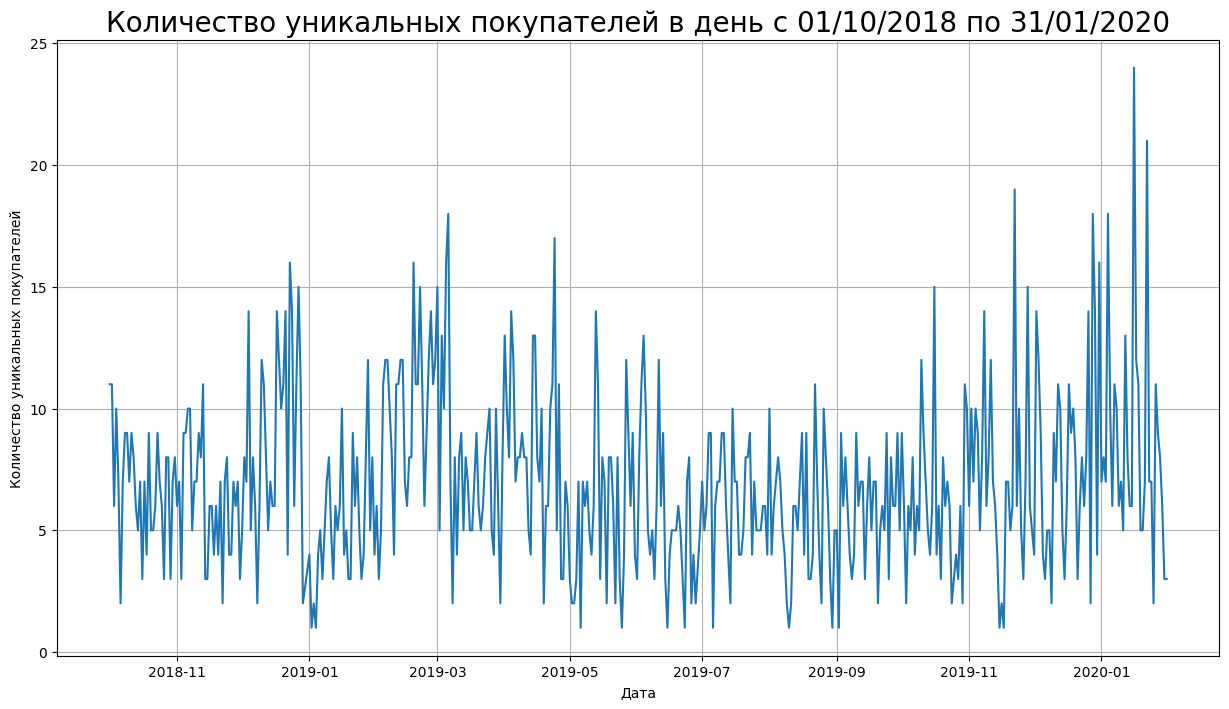

In [ ]:
# строим график уникальных покупателей в день
data_fin.groupby(['day']).agg({'customer_id': 'nunique'}) \
         .plot(figsize=(15,8), grid=True, legend=False)
plt.title('Количество уникальных покупателей в день с 01/10/2018 по 31/01/2020', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('Количество уникальных покупателей')
plt.show()

- Количество уникальных покупателей варьируется от дня к дню и имеет различные значения. Например, в некоторые дни количество уникальных покупателей составляет всего 1 или 2, в то время как в другие дни оно может достигать 24 или 21.
- Наблюдается некоторая вариативность количества уникальных покупателей в разные периоды времени. Например, в декабре 2018 года и январе 2019 года количество уникальных покупателей имело большие значения, тогда как в некоторые дни в октябре 2018 года и феврале 2019 года оно было значительно меньше.

#### Количество покупателей по месяцам

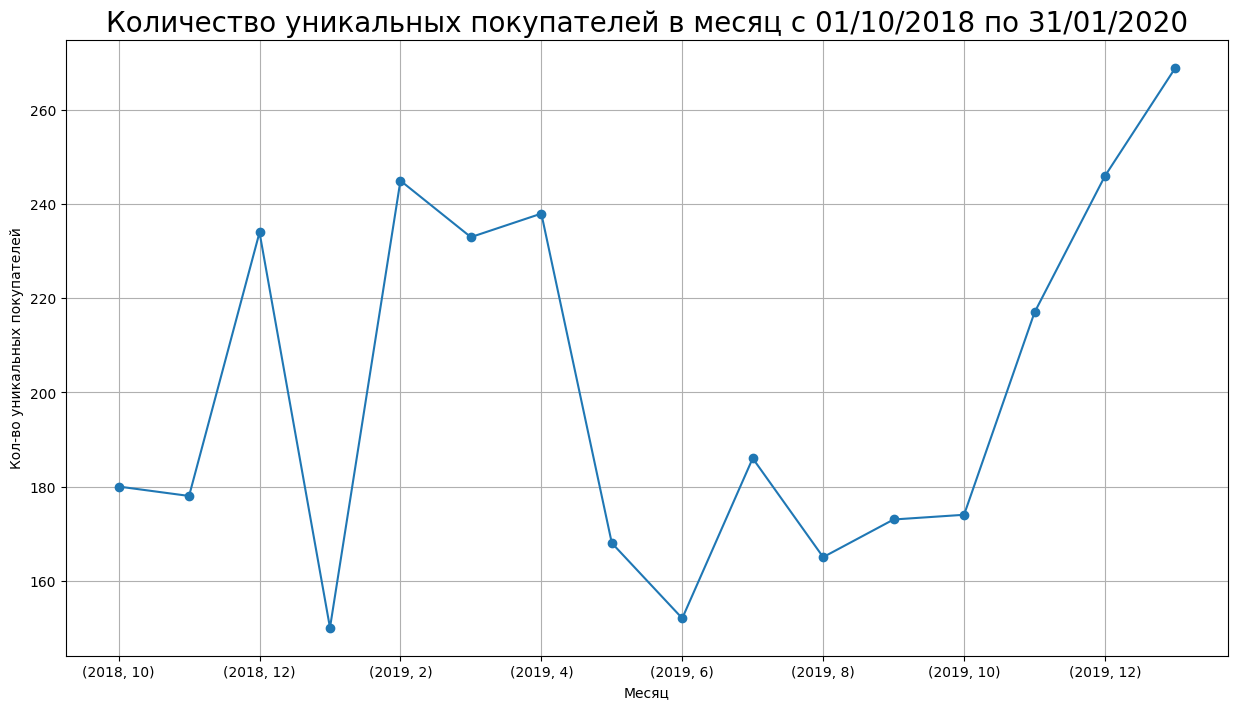

In [ ]:
# строим график уникальных покупателей в месяц
data_fin.groupby(['year', 'month']).agg({'customer_id': 'nunique'}) \
      .plot(marker='o', figsize=(15,8), grid=True, legend=False)
plt.title('Количество уникальных покупателей в месяц с 01/10/2018 по 31/01/2020', fontsize=20)
plt.xlabel('Месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

- Общее количество уникальных покупателей варьируется от месяца к месяцу. Например, в январе 2020 года было зарегистрировано наибольшее число уникальных покупателей (269), в то время как в октябре 2018 года было зарегистрировано наименьшее число уникальных покупателей (178).
- Есть некоторые тренды в количестве уникальных покупателей. Например, с октября 2018 года по январь 2019 года наблюдается увеличение количества уникальных покупателей, а затем с февраля 2019 года по сентябрь 2019 года количество уникальных покупателей остается относительно стабильным.
- Сезонные факторы могут влиять на количество уникальных покупателей. Например, в декабре наблюдается значительный рост количества уникальных покупателей (246), что может быть связано с праздничным сезоном и повышенным спросом на товары.
- В общем количество уникальных покупателей вырасло относительно начала исследуемого периода.

### Количество заказов

#### Количество заказов по месяцам

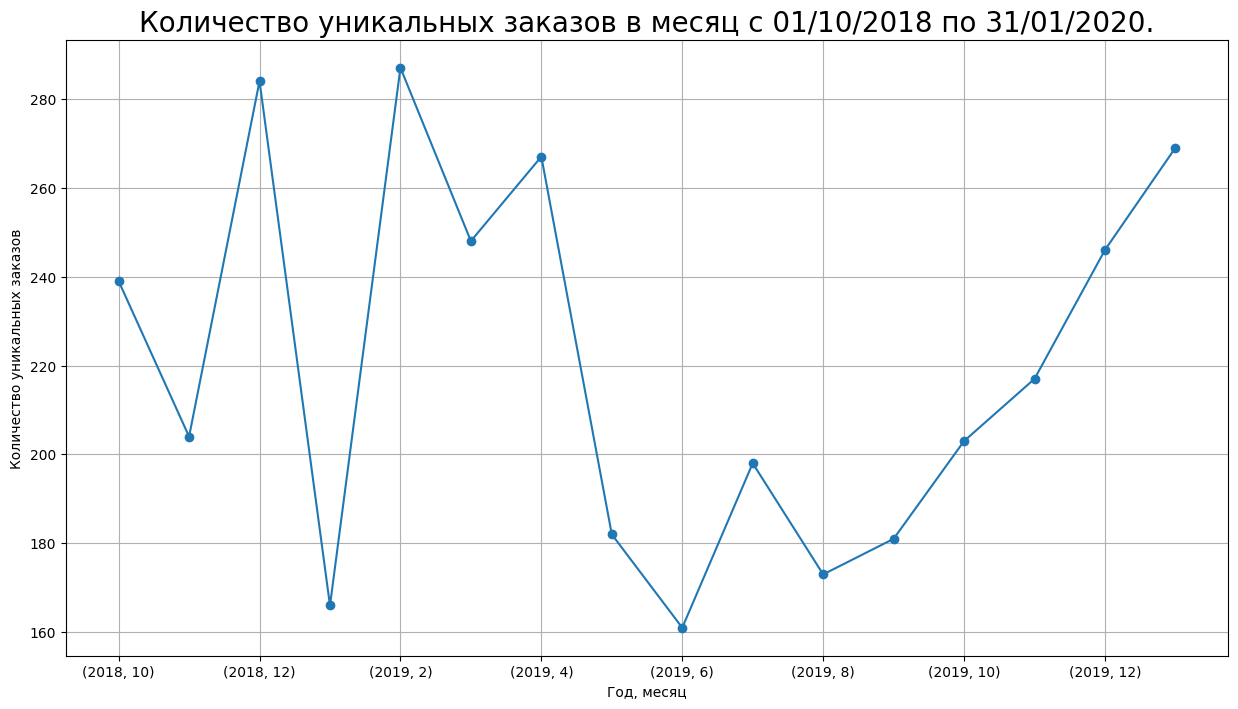

In [ ]:
# строим график по количеству уникальных заказов в месяц.
data_fin.groupby(['year', 'month']).agg({'order_id': 'nunique'}) \
      .plot(marker='o', figsize=(15,8), grid=True, legend=False)
plt.title('Количество уникальных заказов в месяц с 01/10/2018 по 31/01/2020.', fontsize=20)
plt.xlabel('Год, месяц')
plt.ylabel('Количество уникальных заказов')
plt.show()

- Наблюдается неравномерность в количестве уникальных заказов в течение года. В период с февраля по апрель количество заказов достигает своего пика, а затем постепенно снижается до декабря. Это может указывать на сезонные факторы или специфические тренды покупательского поведения в разные месяцы.
- Самый высокий уровень уникальных заказов наблюдается в феврале, с апреля по июнь и в январе. В этих месяцах количество заказов превышает 250.
- Самый низкий уровень уникальных заказов отмечается в сентябре и ноябре, где количество заказов составляет около 180-190.
- Июнь и июль 2019 года также продемонстрировали стабильную активность с 162 и 197 уникальными заказами соответственно. В августе и сентябре количество заказов составило 174 и 182.

#### Количество заказов в течени дня

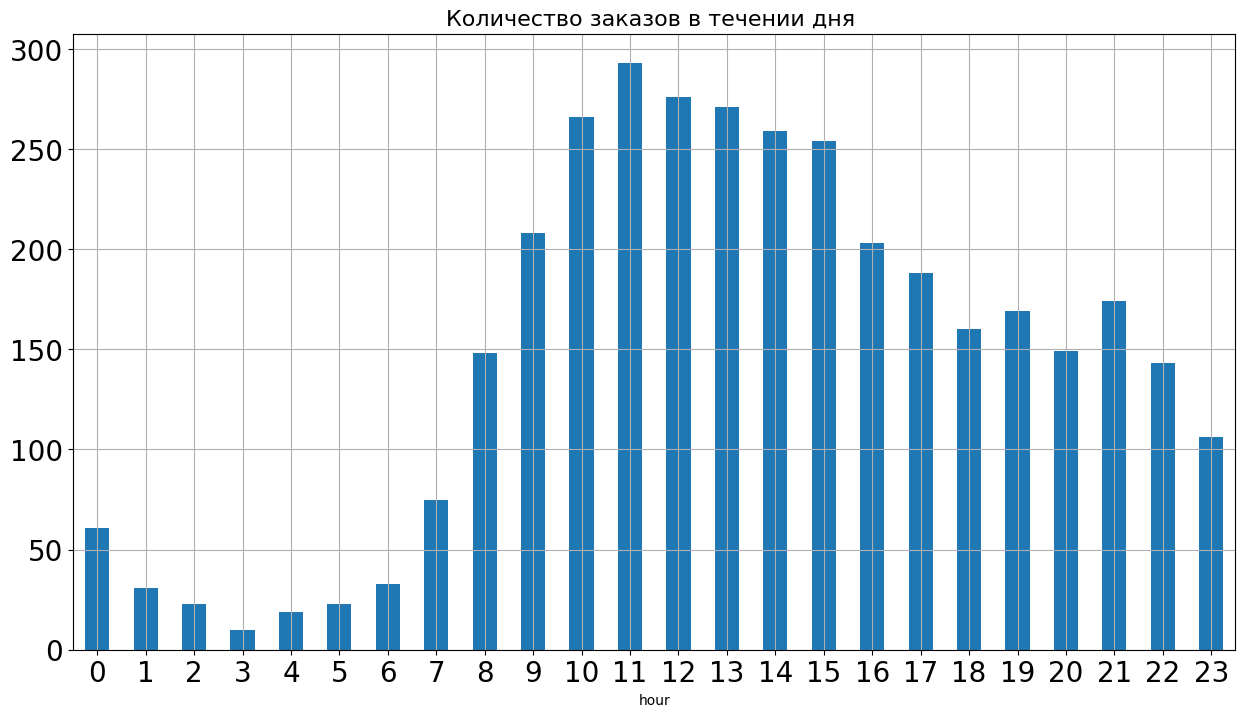

In [ ]:
#количество уникальных заказов в течении дня за весь период
data_fin.pivot_table(index='hour', values='order_id', aggfunc='nunique', fill_value=0)\
.plot(kind='bar', figsize=(15,8), grid=True, y=['order_id'], fontsize=20, legend=False)
plt.title('Количество заказов в течении дня ', fontsize=16)
plt.xticks(rotation=0)
plt.show()

- Наблюдается явная динамика количества уникальных заказов в зависимости от времени суток. Количество заказов начинает увеличиваться с 7 утра, достигает пика в период с 10 до 16 часов и постепенно снижается после 16 часов. Это может указывать на активность покупателей в течение рабочего дня.
- Наибольшее количество уникальных заказов регистрируется в период с 9 до 13 часов, где количество заказов превышает 250. Этот период можно считать наиболее активным для совершения покупок.
- Вечернее время также остается достаточно активным для покупок. В период с 18 до 21 часа наблюдается относительно стабильное количество уникальных заказов, хотя оно немного снижается по сравнению с пиковыми часами.
- В ночное время (с 0 до 6 часов) количество уникальных заказов значительно снижается, что объясняется тем, что большинство людей спят в это время. Однако даже в этот период наблюдается некоторая активность, что может быть связано с покупками людей, работающих в смену или находящихся в других часовых поясах.

### ТОП-10 товаров по выручке

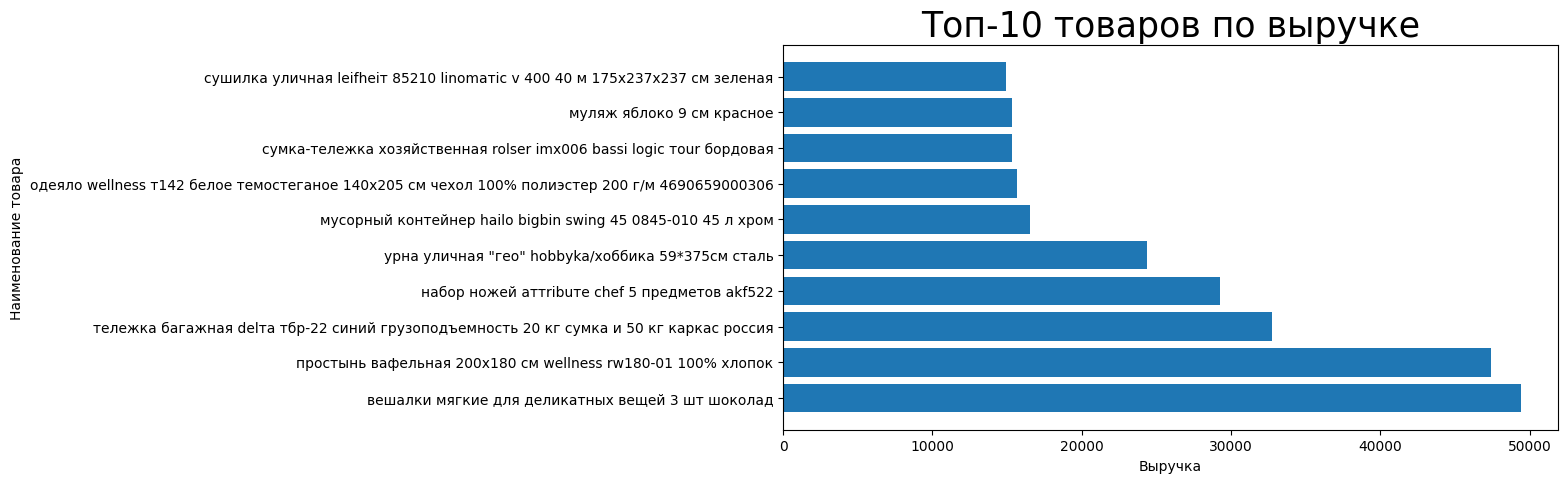

In [ ]:
# Составим ТОП-10 товаров по выручке
total_products = data_fin.pivot_table(index=['order_id', 'product'], values='total', aggfunc='sum') \
    .sort_values(by='total', ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 5))
plt.title('Топ-10 товаров по выручке', fontsize=25)
plt.barh(total_products['product'],total_products['total'])
plt.xlabel('Выручка')
plt.ylabel('Наименование товара')
plt.show()

- Вешалки мягкие для деликатных вещей 3 шт шоколад" занимают первое место по выручке с общей суммой 49432.0 д.е..
- "Простынь вафельная 200х180 см wellness rw180-01 100% хлопок" занимает второе место с общей суммой 47385.0д.е..
- "Тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия" занимает третье место с общей суммой 32718.0 д.е..
- "Набор ножей attribute chef 5 предметов akf522" занимает четвертое место с общей суммой 29248.0 д.е..
- "Урна уличная 'гео' hobbyka/хоббика 59*375см сталь" занимает пятое место с общей суммой 24370.0 д.е..
- "Мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром" занимает шестое место с общей суммой 16536.0 д.е..
- "Одеяло wellness т142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м " занимает седьмое место с общей суммой 15680.0 д.е..
- "Сумка-тележка хозяйственная rolser imx006 bassi logic tour бордовая" занимает восьмое место с общей суммой 15358.0 д.е..
- "Муляж яблоко 9 см красное" занимает девятое место с общей суммой 15300.0 д.е..
- "Наматрацник natures бархатный бамбук бб-н-1-2 односпальный 100% хлопок стеганый 90х200 см с резинкой по углам белый" занимает десятое место с общей суммой 14196.0 д.е..

### ТОП-10 товаров по количеству продаж

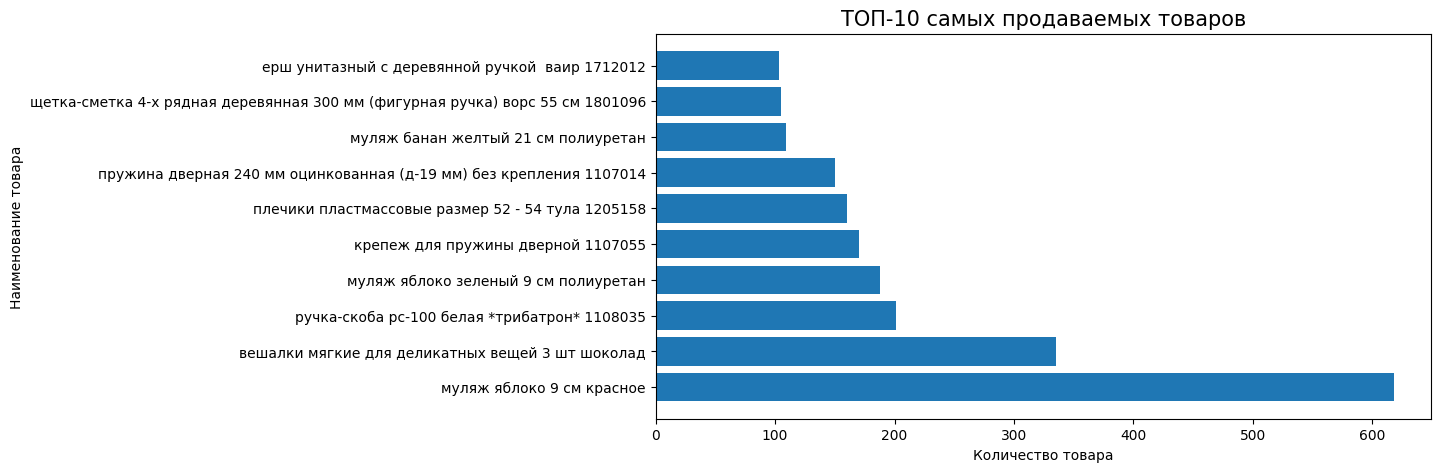

In [ ]:
#ТОП-10 самых продаваемых товаров
products_sellers = data_fin.pivot_table(index=['product'],\
                                                   values='quantity',\
                                                   aggfunc='sum')\
                                                   .sort_values(by='quantity',ascending=False).reset_index().head(10)

plt.figure(figsize=(10,5))
plt.title('ТОП-10 самых продаваемых товаров', fontsize=15)
plt.barh(products_sellers['product'], products_sellers['quantity'])
plt.xlabel('Количество товара')
plt.ylabel('Наименование товара')
plt.show()

- Муляж яблока красного цвета размером 9 см занимает первое место в списке. Его количество продаж составляет 618 штук.
- Второе место занимают вешалки мягкие для деликатных вещей, шоколадного цвета, в количестве 335 штук.
- Муляж яблока зеленого цвета размером 9 см из полиуретана располагается на третьей строчке списка с 308 проданными единицами.
- Ручка-скоба белого цвета от производителя трибатрон занимает четвертое место с 201 продажей.
- Крепеж для пружины дверной располагается на пятой позиции, его количество продаж составляет 170 штук.
- Пластмассовые плечики размером 52-54 от производителя Тула занимают шестое место с 160 проданными единицами.
- Дверная пружина длиной 240 мм, оцинкованная, с диаметром 19 мм без крепления располагается на седьмой строчке списка с 150 продажами.
- Муляж банана желтого цвета размером 21 см из полиуретана занимает восьмое место с 109 проданными единицами.
- Щетка-сметка 4-х рядная деревянная с фигурной ручкой, размером 300 мм и ворсом 55 см занимает девятое место с 105 продажами.
- Унитазная щетка с деревянной ручкой от производителя Ваир располагается на десятой позиции списка. Ее количество продаж составляет 103 штуки.

### Количество проданных товаров по категориям с разбивкой по сегментам покупателей

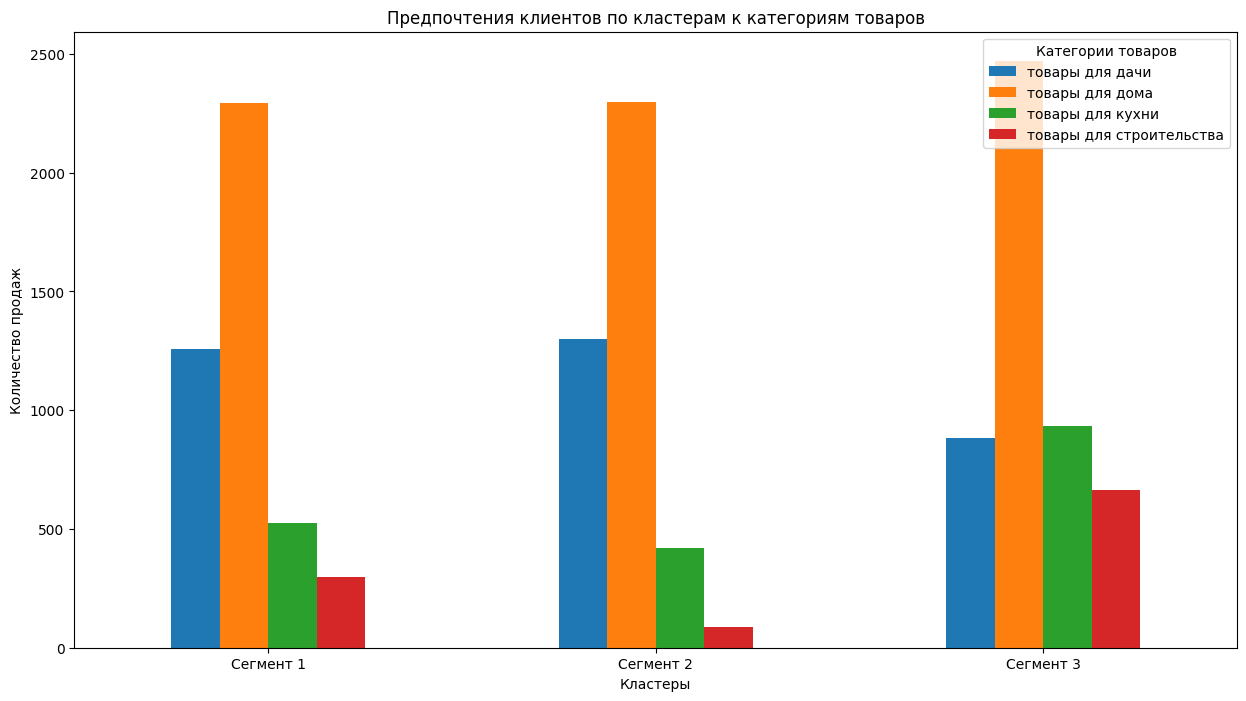

In [ ]:
# Группировка данных по кластерам и категориям товаров
cluster_category_data = data_fin.groupby(['segment', 'product_categ']).agg({'quantity': 'sum'})
# Построение сводной таблицы
pivot_table = pd.pivot_table(cluster_category_data, values='quantity', index='segment', columns='product_categ', fill_value=0)
# Визуализация результатов анализа
pivot_table.plot(kind='bar', figsize=(15, 8))
plt.title('Предпочтения клиентов по кластерам к категориям товаров')
plt.xlabel('Кластеры')
plt.ylabel('Количество продаж')
plt.xticks(rotation=0)
plt.legend(title='Категории товаров')
plt.show()

- В Сегменте 1 наибольшее количество покупок приходится на товары для дома (2351) и товары для дачи (1250). Этим клиентам можно рекомендовать рассылку, содержащую предложения по товарам для дома и товары для дачи. Также стоит учесть, что в этом сегменте имеется спрос на товары для кухни (529) и товары для строительства (297), и их можно включить в рекламные предложения, но с меньшим приоритетом.
- В Сегменте 2 также наблюдается высокий спрос на товары для дома (2426) и товары для дачи (1317). Поэтому рекомендуется отправлять рассылку с акциями и предложениями по этим категориям. Товары для кухни (423) и товары для строительства (87) также могут заинтересовать клиентов этого сегмента, но их спрос ниже, поэтому можно уделить им меньше внимания.
- В Сегменте 3 клиенты проявляют наибольший интерес к товарам для дома (2470) и товары для кухни (933). Рекомендуется отправлять рассылку, фокусируясь на эти категории. Товары для дачи (885) и товары для строительства (663) также имеют спрос, но не такой высокий, поэтому можно включать их в рассылку с меньшим приоритетом.

### Выручка по кластерам покупателей

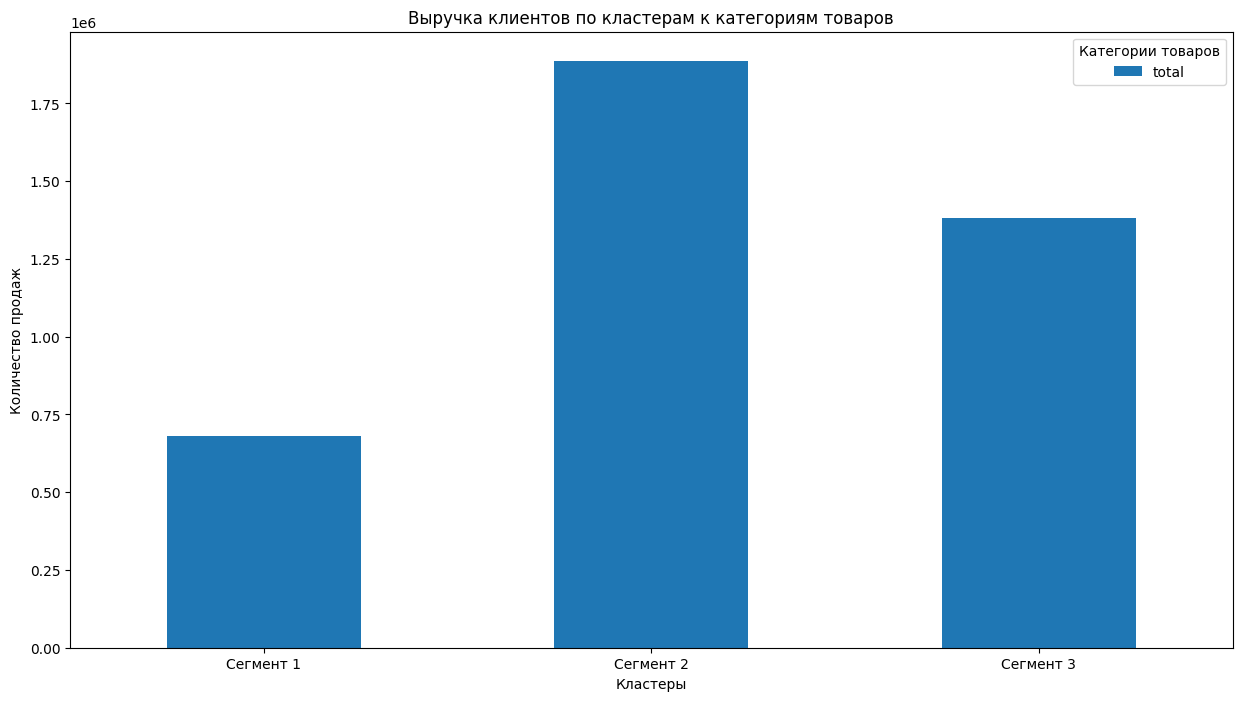

In [ ]:
# Группировка данных по кластерам и категориям товаров
cluster_category_data = data_fin.groupby(['segment']).agg({'total': 'sum'})
# Построение сводной таблицы
pivot_table = pd.pivot_table(cluster_category_data, values='total', index='segment', fill_value=0)
# Визуализация результатов анализа
pivot_table.plot(kind='bar', figsize=(15, 8))
plt.title('Выручка клиентов по кластерам к категориям товаров')
plt.xlabel('Кластеры')
plt.ylabel('Количество продаж')
plt.xticks(rotation=0)
plt.legend(title='Категории товаров')
plt.show()

Самая большая выручка у второго сегмента покупателей 1886229 д.е, вторая по величине выручка у третьего сегмента покупателей 1381633 д.е., самая маленькая выручка у первого сегмента покупателей 6800167 д.е.

### Выручка по кластерам покупателей в разрезе категорий товаров

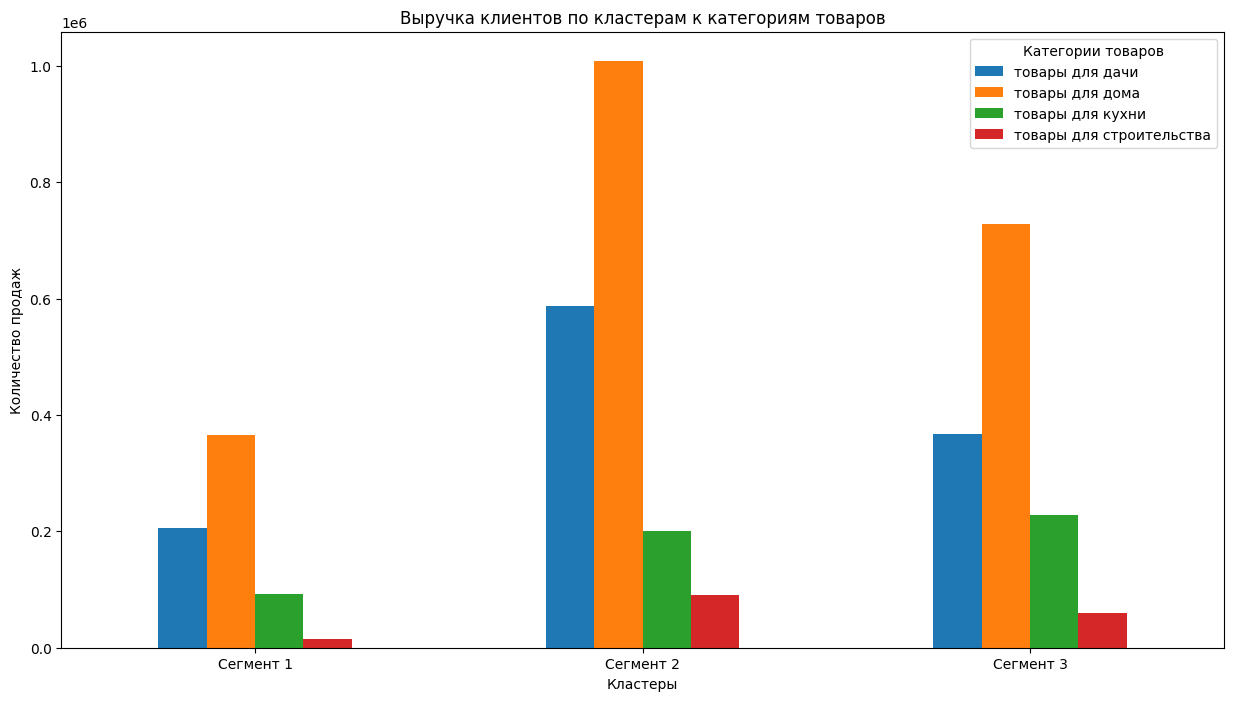

In [ ]:
# Группировка данных по кластерам и категориям товаров
cluster_category_data = data_fin.groupby(['segment', 'product_categ']).agg({'total': 'sum'})
# Построение сводной таблицы
pivot_table = pd.pivot_table(cluster_category_data, values='total', index='segment', columns='product_categ', fill_value=0)
# Визуализация результатов анализа
pivot_table.plot(kind='bar', figsize=(15, 8))
plt.title('Выручка клиентов по кластерам к категориям товаров')
plt.xlabel('Кластеры')
plt.ylabel('Количество продаж')
plt.xticks(rotation=0)
plt.legend(title='Категории товаров')
plt.show()

### Динамика выручки в разрезе категории товаров

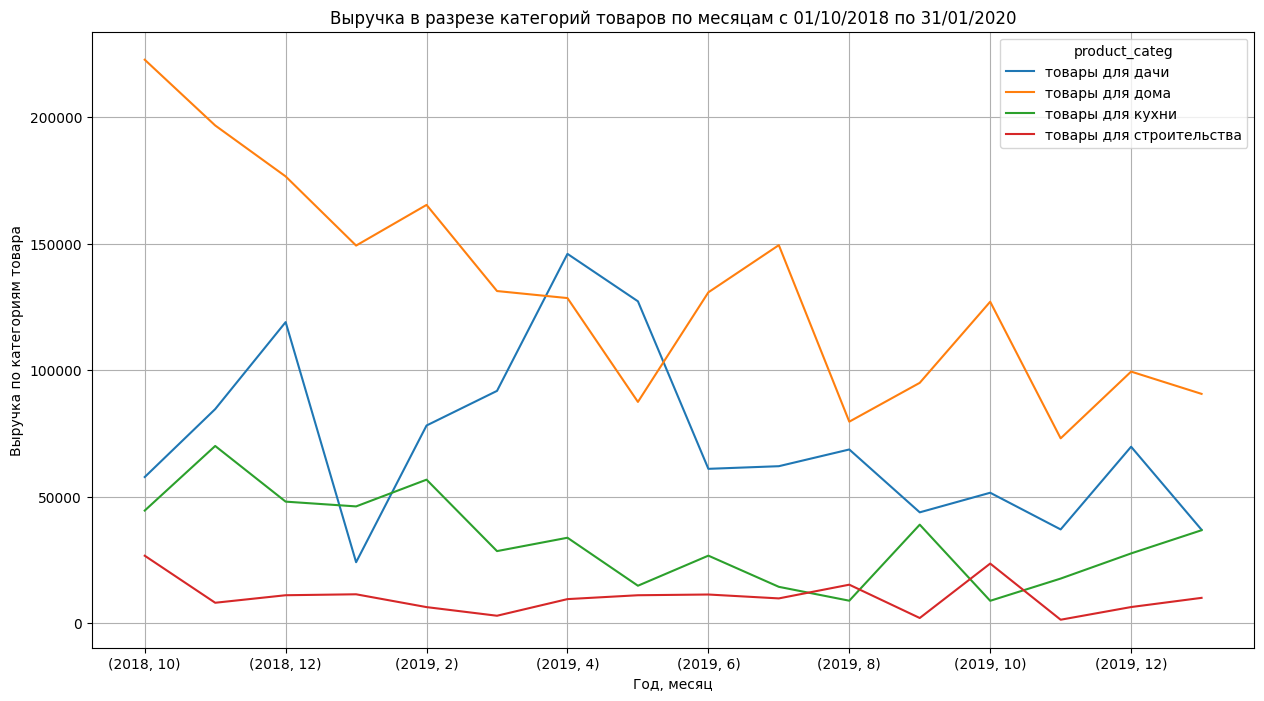

In [ ]:
#построим график выручки по дням в разрезе категорий товаров за период
data_fin.pivot_table(index=['year', 'month'], columns = 'product_categ', values='total', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Выручка в разрезе категорий товаров по месяцам с 01/10/2018 по 31/01/2020')
plt.xlabel('Год, месяц')
plt.ylabel('Выручка по категориям товара')
plt.show()

- Товары для дачи: Выручка по этой категории имеет сезонную зависимость, с пиковыми значениями весной и летом. Рекомендуется делать рассылку клиентам, интересующимся дачным сезоном, в период повышенного спроса, а лучше за месяц до пиков. Это подогреет аудиторию для продаж.
- Товары для дома: Выручка по этой категории в начале периода (2018 год) была на максимуме, но с течением времени снижалась. Рекомендуется анализировать причины снижения выручки и принимать меры для стимулирования спроса, например, проводить рассылку с акциями и предложениями по товарам для дома, делать акцент на качество, уникальность или дополнительные услуги.
- Товары для кухни: Выручка по этой категории имеет колебания, но в целом показывает умеренное снижение. Рекомендуется делать рассылку клиентам, интересующимся кухонными товарами, и предлагать актуальные предложения и акции в период повышенного спроса, например, перед праздниками или сезоном готовки.
- Товары для строительства: Выручка по этой категории также имеет колебания, но сохраняет стабильность. Рекомендуется делать рассылку как постоянным клиентам, так и новым клиентам, интересующимся ремонтными или строительными работами, и предлагать акции и специальные предложения.

Для более уверенного вывода о сезонности тавара лучше рассматривать данные за 2-3 последних года

### Динамика количества продаж по категориям

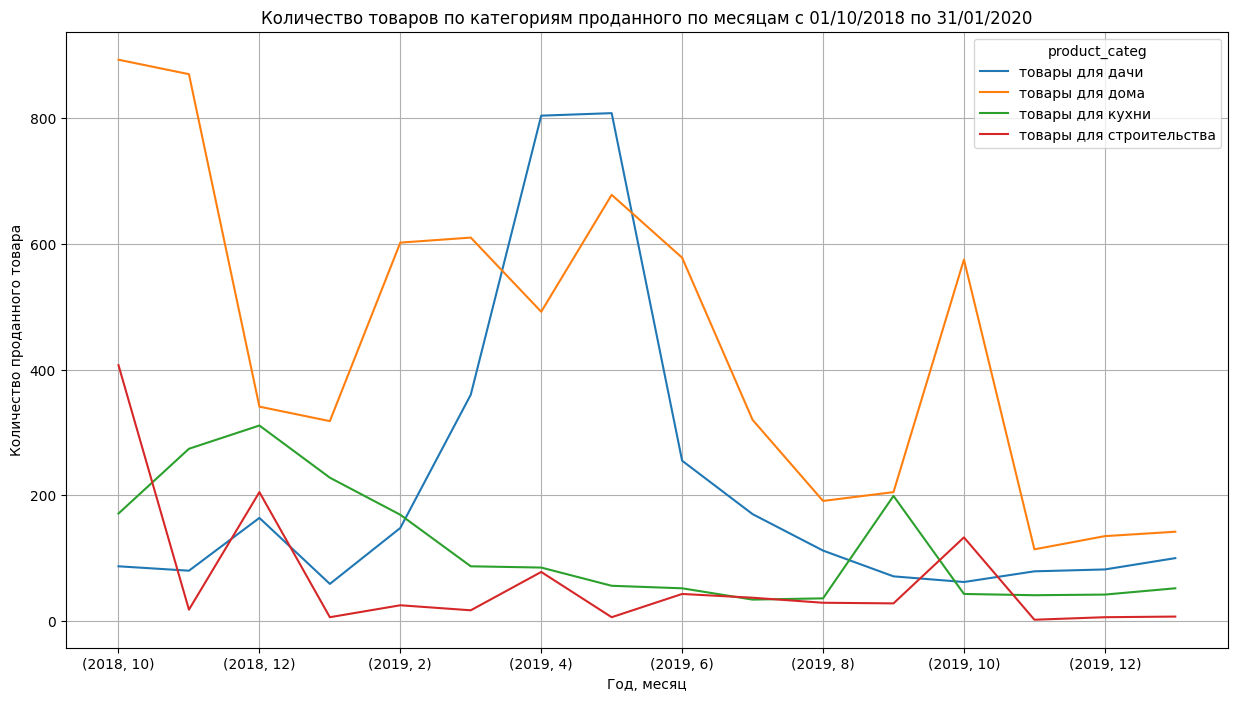

In [ ]:
#построим график продаж товаров в количественном выражении а разрезе категорий по месяцам
data_fin.pivot_table(index=['year', 'month'], columns = 'product_categ', values='quantity', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Количество товаров по категориям проданного по месяцам с 01/10/2018 по 31/01/2020')
plt.xlabel('Год, месяц')
plt.ylabel('Количество проданного товара')
plt.show()

- Товары для дачи: Наблюдается сезонная динамика с наибольшим спросом весной и начале лета (май-июнь). Количество продаж снижается осенью и зимой. Рекомендуется усилить рассылку предложений по товарам для дачи весной и летом, когда спрос на них выше. Лучше начать прогрев покупателей за месяц до указанных пиков, чтобы подогреть аудиторию и сформировать потребности.
- Товары для дома: Эта категория товаров показывает стабильный снижение продаж на протяжении всего года.  Имеет провалы в декабре (вероятно предпочтения смещаются в сторону приобретения новогодних подарков) и июнь-сентябрь(возможно связано с дачным сезоном) Количество продаж остается относительно высоким. Рекомендуется проводить регулярные рассылки предложений по товарам для дома в течение всего года.
- Товары для кухни: Наблюдается некоторая сезонная динамика с пиком продаж в конце 2018 года , этот пик к сожалению не повторился в конце 2019 года , поэтому считать его сезонным не получиться.Снижение продаж  летом и осенью. Рекомендуется уделить особое внимание рассылке предложений по товарам для кухни в начале года, а также проводить дополнительные акции и скидки в периоды сниженного спроса.
- Товары для строительства: Спрос на эти товары показывает стабильностьь в течение года. Наблюдались повышенные продажи в октябре 2018 ги 2019. В остальное время продажи по количеству товаров не высоки. Рекомендуется усилить рассылку предложений по товарам для строительства в эти периоды повышенного спроса.

Для более уверенного вывода о сезонности тавара лучше рассматривать данные за 2-3 последних года

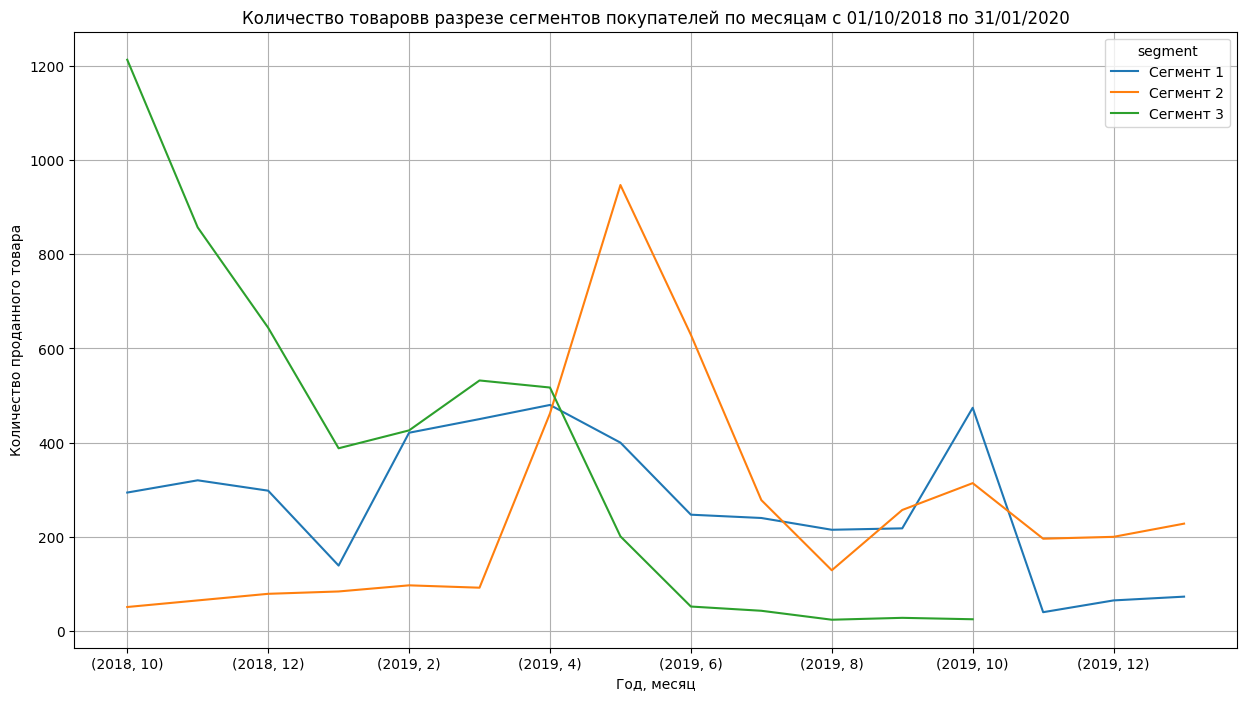

In [ ]:
#построим график продаж товаров в количественном выражении в разрезе сегментов покупателей по месяцам
data_fin.pivot_table(index=['year', 'month'], columns = 'segment', values='quantity', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Количество товаровв разрезе сегментов покупателей по месяцам с 01/10/2018 по 31/01/2020')
plt.xlabel('Год, месяц')
plt.ylabel('Количество проданного товара')
plt.show()

Динамика продаж по сегментам:

- Сегмент 1: Объемы продаж в сегменте 1 колеблются в течение года, но не показывают явных трендов роста или спада. В начале 2019 года продажи были на относительно низком уровне, затем возрастали в течение года и достигали пика в октябре. Однако в конце 2019 года и в начале 2020 года продажи в сегменте снизились.
- Сегмент 2: Продажи в сегменте 2 демонстрируют стабильный рост в течение рассматриваемого периода. В начале 2019 года объемы продаж были низкими, но затем начали увеличиваться, достигая пиковых значений в середине 2019 года. Затем продажи оставались на высоком уровне в течение 2019 года и начала 2020 года.
- Сегмент 3: В сегменте 3 также наблюдается падение объемов продаж. В начале 2019 года продажи были на максимуме, затем начали уменьшаться и достигли нулевых значений  в конце 2019 года.С октября 2019 годя от вас полностью ушли клиенты 3 сегмента.

Значимость сегментов:
Сегменты 2 и 3 демонстрируют более высокие объемы продаж по сравнению с сегментом 1. Особенно сегмент 2 выделяется стабильным и значительным ростом продаж, что указывает на его важность и потенциал для развития и увеличения дохода интернет-магазина.
Сегмент 1 имеет более низкие объемы продаж, но все равно представляет определенную значимость и потенциал для улучшения.

Рекомендации:
Для сегмента 2, который демонстрирует стабильный рост продаж, можно сосредоточиться на удержании клиентов и разработке персонализированных маркетинговых стратегий, чтобы повысить их лояльность и увеличить средний чек.
Для сегментов 1 и 3, где объемы продаж ниже, можно провести анализ предпочтений клиентов и внедрить мероприятия по стимулированию покупок, такие как акции, скидки или программы лояльности, чтобы привлечь больше клиентов и увеличить объемы продаж.
Также стоит изучить данные за конец 2019 года и начало 2020 года для сегмента 3, чтобы получить полную картину динамики продаж и принять соответствующие меры для его развития. К концу наблюдаемого периода самые важные клиенты перестали покупать в интернет магазине. Им нужно сделать персональную рассылку с более выгодными условиями, а лучше индивидуально связаться и предложить выгодняе условия.

## Сезонность категорий товара по кластерам

 ### Первый кластер : Сезонность продаж по категорям товара

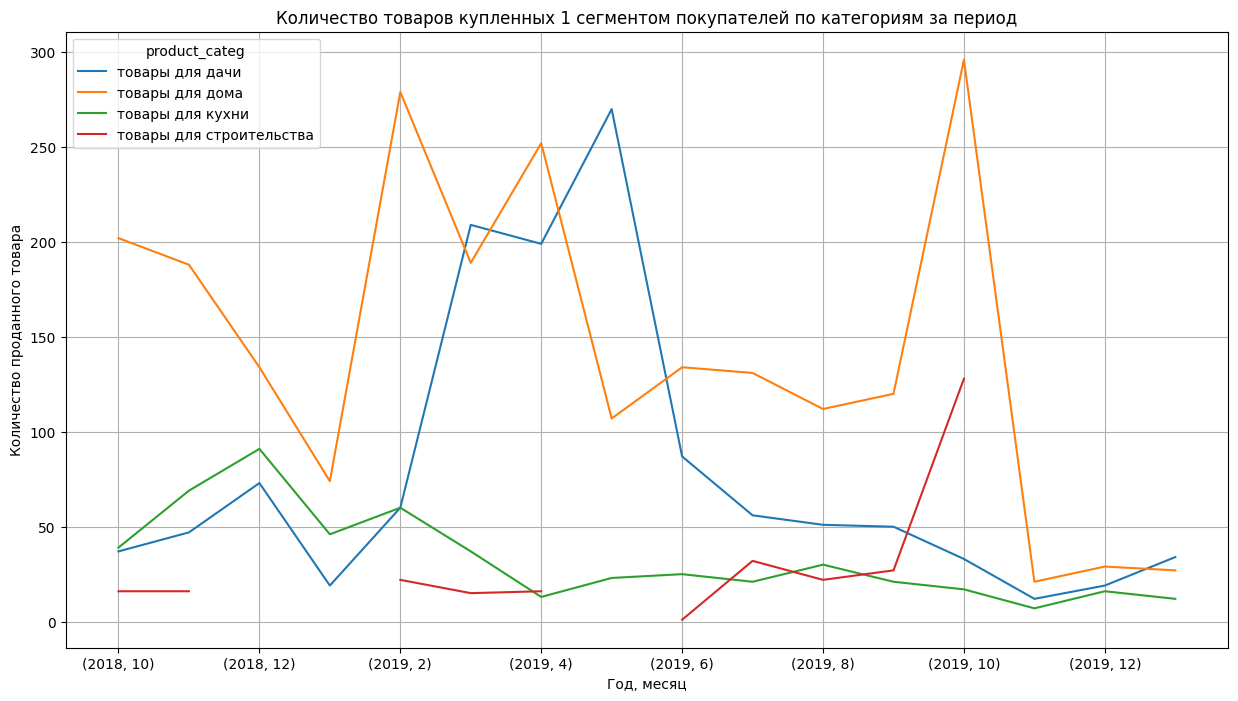

In [ ]:
#построим график продаж товаров в количественном выражении а разрезе категорий по месяцам
data_fin.query('segment =="Сегмент 1"').pivot_table(index=['year', 'month'], columns = 'product_categ', values='quantity', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Количество товаров купленных 1 сегментом покупателей по категориям за период')
plt.xlabel('Год, месяц')
plt.ylabel('Количество проданного товара')
plt.show()

Сезонность для 1-го сегмента покупателей(третья по величине выручки 680016 д.е.):
- Категория "Товары для дома" показывает стабильный спрос в течение года, с пиковыми значениями в фврале, апреле и ноябре. Это может быть связано с сезоном осенних и зимних праздников, когда люди активно приобретают товары для дома и подарки. Предпочтительная категория для данного сегмента.
- Категория "Товары для дачи" имеет пиковый спрос в мае и июне, что соответствует сезону отдыха и работы на даче. В это время покупатели активно приобретают товары, необходимые для озеленения, ухода за садом и ремонта на даче. Предпочтительная категория для данного сегмента.
- Категория "Товары для кухни" показывает высокий спрос в декабре и феврале. Это может быть связано с празднованием Нового года и подготовкой к 8 марта.
- Категория "Товары для строительства" имеет пиковый спрос в октябре, что может быть связано с завершением дачного сезона и началом ремонтных работ дома.

Рекомендации для 1-го сегмента покупателей:
- Для увеличения количества продаваемого товара в категории "Товары для дома" можно проводить маркетинговые акции и рекламные кампании перед осенним и зимним сезонами праздников. Также стоит обратить внимание на ассортимент и разнообразие предлагаемых товаров для привлечения широкой аудитории.
- Для повышения возвращаемости покупателей в категории "Товары для дачи" можно разработать программу лояльности или сезонные скидки для постоянных клиентов. Важно поддерживать коммуникацию с покупателями и предлагать им актуальные товары и решения для дачи. Начинать рекламную компанию за месяц перед началом дачного сезона, подогревая интерес аудитории
- В категории "Товары для кухни" стоит уделить  рекламным рассылкам за 2-3 недели до 8 марта и Нового года.Также стоит активно использовать социальные сети и блогеров для продвижения товаров перед этими празниками.
- Для категории "Товары для строительства" для этой категории рекомендуем начинать проводить рассылку в конце августа - сентябре, для формирования спроса и прогрева клиентов, в начале октября высылать предложения по акциям и скидкам.

 ### Второй кластер : Сезонность продаж по категориям товара

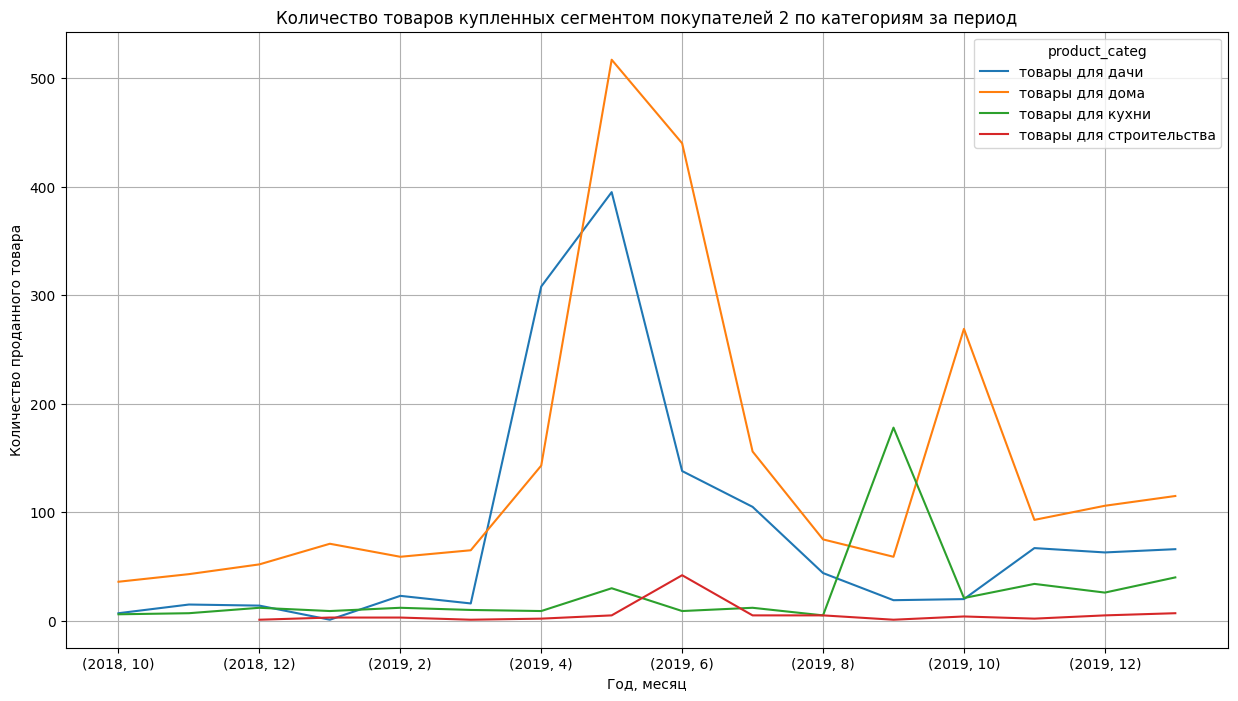

In [ ]:
#построим график продаж товаров в количественном выражении а разрезе категорий по месяцам
data_fin.query('segment =="Сегмент 2"').pivot_table(index=['year', 'month'], columns = 'product_categ', values='quantity', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Количество товаров купленных сегментом покупателей 2 по категориям за период')
plt.xlabel('Год, месяц')
plt.ylabel('Количество проданного товара')
plt.show()

Сезонность для 2-го сегмента покупателей (самая большая по величине выручки 1886229 д.е):
   - Товары для дачи: Наблюдается сезонный рост продаж март-май,пик приходиться на май,  затем снижение май-август и низкий спрос в остальной сезон. Предпочтительная категория для данного сегмента.
   - Товары для дома: Продажи показывают стабильное повышение на протяжении всего года, с пиковыми значениями в мае и октябре месяце. Вероятно это связано с покупкой необходимый товаров для дачи в мае и в октябре для дома. Предпочтительная категория для данного сегмента.
   - Товары для кухни: Продажи также показывают стабильное повышение на протяжении года, с небольшим пиком в сентябре.
   - Товары для строительства: Продажи показывают стабильно низкие продажи, наибольшие значения наблюдаются в июне.

Рекомендации для 2-го сегмента покупателей:
- Товары для дачи: Обратите внимание на повышенный спрос на товары для дачи в месяцы апрель-июнь. В этот период можно проводить активные маркетинговые кампании, предлагать специальные предложения и скидки на товары для дачи, чтобы привлечь больше клиентов. В марет месяце можно начинать проводить рассылку для прогрева и привлечения клиентов.
- Разработайте рекламные материалы, подчеркивающие удобство и практичность товаров для дачи, а также их способность облегчить уход за садом и огородом.
- В сезонный спрос на товары для дачи входят семена, рассада, удобрения, садовый инструмент и принадлежности. Уделите особое внимание этим категориям товаров и предлагайте разнообразные варианты и комплекты.

- Товары для дома:  Для увеличения количества продаваемого товара можно проводить маркетинговые акции и рекламные кампании перед летним и осенним пиком продаж, привлекая к себе клиентов.
- Предлагайте комплексные решения для обустройства дома, включая мебель, текстиль, предметы декора и аксессуары. Это может стимулировать дополнительные покупки и повысить средний чек.
- Обратите внимание на категории товаров, которые пользуются наибольшим спросом, например, посуду или бытовую технику, и разработайте акции, скидки или бонусные программы для поощрения повторных покупок.

- Товары для кухни: Учитывая низкий спрос на товары для кухни и пик в сентябре у этого сегмента покупателей предлагаем организовать дегустации или мастер-классы, связанные с кулинарией, чтобы привлечь клиентов и продемонстрировать использование предлагаемых товаров для кухни. В августе проводить рассылки, а в сентябре предлагать скидки и акции по товраам для этого сегмета.
- Помимо продажи товаров, сосредоточьтесь на создании полезного контента, связанного с кулинарией, такого как рецепты, советы по приготовлению пищи и хранению продуктов. Это поможет установить взаимодействие с клиентами и поддерживать их интерес к товарам для кухни.

- Товары для строительства: Стабильно низкий спрос на товары для строительства с небольшим пиком в июне. Рекомендуем начинать проводить рассылку в конце мае, для формирования спроса и прогрева клиентов, в начале июня высылать предложения по акциям и скидкам.

### Третий кластер :Сезонность продаж по категориям товара

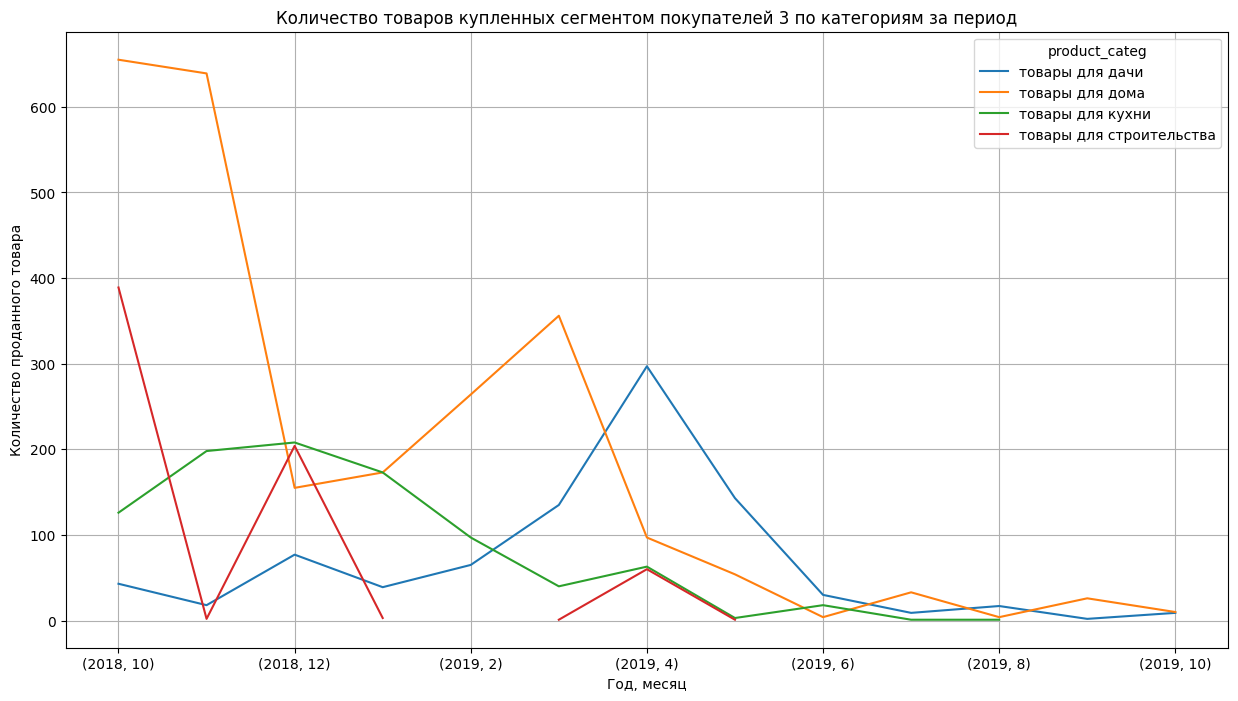

In [ ]:
#построим график продаж товаров в количественном выражении в разрезе категорий по месяцам
data_fin.query('segment =="Сегмент 3"').pivot_table(index=['year', 'month'], columns = 'product_categ', values='quantity', aggfunc='sum')\
.plot(grid=True, figsize=(15, 8),title = 'Количество товаров купленных сегментом покупателей 3 по категориям за период')
plt.xlabel('Год, месяц')
plt.ylabel('Количество проданного товара')
plt.show()

Сезонность для 3-го сегмента покупателей (вторая по величине выручки 1381633 д.е):
   - Товары для дачи: Продажи товаров для дачи достигают пика в середине весны (апрель) и снижаются к концу Осени (сентябрь-октябрь). Наблюдается падение продаж в течении периода, в последние три месяцв (ноябрь, декабрь 2019 и январь 2020) продаж в этой категории товаров совсем не было. Предпочтительная категория для данного сегмента.
   - Товары для дома: Продажи товаров в исследуемом периоде резко упали с пиковых в ноябре 2018 до отсутствия продаж в ноябре, декабре 2019 и январе 2020. с небольшим пиком в марте 2019. Наибольшие значения продаж наблюдаются в начале осени (сентябрь-октябрь). Предпочтительная категория для данного сегмента.
   - Товары для кухни: Продажи товаров для кухни также стабильно снижалась на протяжении всего периода с пиком продаж в декабре 2018 и отсутствием продаж с сентября 2019 по январь 2020 г.
   - Товары для строительства: Продажи товаров для строительства имеют нерегулярную динамику, но общий тренд указывает на уменьшение продаж с пика в октябре 2018 их полное отсутствие с мая 2019 до конца периода.Этот сегмент перестал делать покупки в этом магазине.

Рекомендации для 3-го сегмента покупателей:
   - Товары для дачи: Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Товары для дома: Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Товары для кухни: Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Этот сегмент перестал делать покупки в этом магазине. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.

Повышение возвращаемости покупателей:
   - Разработайте программы лояльности и стимулирующие мероприятия для постоянных покупателей. Это может включать бонусные программы, скидки для повторных покупок или специальные предложения.
   - Предлагайте дополнительные услуги или консультации, связанные с приобретаемыми товарами. Например, проводите мастер-классы, вебинары или предоставляйте инструкции по использованию товаров.
   - Активно взаимодействуйте с клиентами через различные каналы коммуникации, например, по электронной почте, SMS-рассылке или социальным сетям, чтобы поддерживать связь и информировать о новых продуктах, акциях и событиях.
   


## Общие выводы

1. Общий вывод по интернет-магазину:

- Товары приносящие самую большую выручку "Товары для дома";
- Выручка в будни выше, чем выручка в выходные;
- Пик продаж в течении дня  с 10 до 16 часов;
- "Товары для дома" самые покупаемые товары всех 3 сегментов покупателей;
- Среднемесячный чек за наблюдаемый период уменьшился;
- Ежемесячная выручка  в наблюдаемом периоде уменьшилась;
- Увеличилось общее количество клиентов к концу периода;
    
Интернет-магазин имеет три основных кластера покупателей, которые различаются по их ценности, давности покупок, количеству и сумме покупок. Эти сегменты можно охарактеризовать как:
   - Сегмент 1: низкая ценность, высокая давность покупок, низкое количество и низкая сумма покупок.
   - Сегмент 2: средняя ценность, средняя давность покупок, среднее количество и средняя сумма покупок.
   - Сегмент 3: высокая ценность,  низкая давность покупок, высокое количество и большая сумма покупок.


Кластер 1: В этот сегмент входят покупатели, совершающие покупки редко, в небольшом количестве и с низкими суммами. Они могут быть характеризованы низкой активностью и низкой ценностью для нас как клиенты. Состоит из клиентов, которые покупают товары для дачи. Этот сегмент предпочитает приобретать товары, связанные с садоводством, озеленением и отдыхом на природе. Третий по величине выручки кластер 680016 д.е.

Сезонность для 1-го сегмента покупателей:
- Категория "Товары для дома" показывает стабильный спрос в течение года, с пиковыми значениями в фврале, апреле и ноябре. Это может быть связано с сезоном осенних и зимних праздников, когда люди активно приобретают товары для дома и подарки.
- Категория "Товары для дачи" имеет пиковый спрос в мае и июне, что соответствует сезону отдыха и работы на даче. В это время покупатели активно приобретают товары, необходимые для озеленения, ухода за садом и ремонта на даче.
- Категория "Товары для кухни" показывает высокий спрос в декабре и феврале. Это может быть связано с празднованием Нового года и подготовкой к 8 марта.
- Категория "Товары для строительства" имеет пиковый спрос в октябре, что может быть связано с завершением дачного сезона и началом ремонтных работ дома.

Рекомендации для 1-го сегмента покупателей:
- Для увеличения количества продаваемого товара в категории "Товары для дома" можно проводить маркетинговые акции и рекламные кампании перед осенним и зимним сезонами праздников. Также стоит обратить внимание на ассортимент и разнообразие предлагаемых товаров для привлечения широкой аудитории.
- Для повышения возвращаемости покупателей в категории "Товары для дачи" можно разработать программу лояльности или сезонные скидки для постоянных клиентов. Важно поддерживать коммуникацию с покупателями и предлагать им актуальные товары и решения для дачи. Начинать рекламную компанию за месяц перед началом дачного сезона, подогревая интерес аудитории
- В категории "Товары для кухни" стоит уделить  рекламным рассылкам за 2-3 недели до 8 марта и Нового года.Также стоит активно использовать социальные сети и блогеров для продвижения товаров перед этими празниками.
- Для категории "Товары для строительства" для этой категории рекомендуем начинать проводить рассылку в конце августа - сентябре, для формирования спроса и прогрева клиентов, в начале октября высылать предложения по акциям и скидкам.

Кластер 2: В этот сегмент входят покупатели, которые делают покупки в среднем количестве и средними суммами. Они имеют умеренную активность в покупках и среднюю ценность для нас как клиенты. Этот сегмент включает в себя покупателей, интересующихся товарами для обустройства дома, интерьерного декора и бытовой техникой.Самый большой по величине выручки кластер 1886229 д.е.

Сезонность для 2-го сегмента покупателей :
   - Товары для дачи: Наблюдается сезонный рост продаж март-май,пик приходиться на май,  затем снижение май-август и низкий спрос в остальной сезон.
   - Товары для дома: Продажи показывают стабильное повышение на протяжении всего года, с пиковыми значениями в мае и октябре месяце. Вероятно это связано с покупкой необходимый товаров для дачи в мае и в октябре для дома.
   - Товары для кухни: Продажи также показывают стабильное повышение на протяжении года, с небольшим пиком в сентябре.
   - Товары для строительства: Продажи показывают стабильно низкие продажи, наибольшие значения наблюдаются в июне.

Рекомендации для 2-го сегмента покупателей:
- Товары для дачи: Обратите внимание на повышенный спрос на товары для дачи в месяцы апрель-июнь. В этот период можно проводить активные маркетинговые кампании, предлагать специальные предложения и скидки на товары для дачи, чтобы привлечь больше клиентов. В марет месяце можно начинать проводить рассылку для прогрева и привлечения клиентов.
- Разработайте рекламные материалы, подчеркивающие удобство и практичность товаров для дачи, а также их способность облегчить уход за садом и огородом.
- В сезонный спрос на товары для дачи входят семена, рассада, удобрения, садовый инструмент и принадлежности. Уделите особое внимание этим категориям товаров и предлагайте разнообразные варианты и комплекты.

- Товары для дома:  Для увеличения количества продаваемого товара можно проводить маркетинговые акции и рекламные кампании перед летним и осенним пиком продаж, привлекая к себе клиентов.
- Предлагайте комплексные решения для обустройства дома, включая мебель, текстиль, предметы декора и аксессуары. Это может стимулировать дополнительные покупки и повысить средний чек.
- Обратите внимание на категории товаров, которые пользуются наибольшим спросом, например, посуду или бытовую технику, и разработайте акции, скидки или бонусные программы для поощрения повторных покупок.

- Товары для кухни: Учитывая низкий спрос на товары для кухни и пик в сентябре у этого сегмента покупателей предлагаем организовать дегустации или мастер-классы, связанные с кулинарией, чтобы привлечь клиентов и продемонстрировать использование предлагаемых товаров для кухни. В августе проводить рассылки, а в сентябре предлагать скидки и акции по товраам для этого сегмета.
- Помимо продажи товаров, сосредоточьтесь на создании полезного контента, связанного с кулинарией, такого как рецепты, советы по приготовлению пищи и хранению продуктов. Это поможет установить взаимодействие с клиентами и поддерживать их интерес к товарам для кухни.

- Товары для строительства: Стабильно низкий спрос на товары для строительства с небольшим пиком в июне. Рекомендуем начинать проводить рассылку в конце мае, для формирования спроса и прогрева клиентов, в начале июня высылать предложения по акциям и скидкам.

Кластер 3: В этот сегмент входят покупатели, совершающие покупки часто, в большом количестве и с высокими суммами. Они проявляют высокую активность в покупках и имеют высокую ценность для нас как клиенты. Этот сегмент включает в себя покупателей, заинтересованных в кухонной утвари, посуде, кухонных аксессуарах и товаров строительной тематики в больших количествах, вероятно это как-то связано со спецификой их работы.Второй  по величине выручки кластер 1381633 д.е

Сезонность для 3-го сегмента покупателей :
   - Товары для дачи: Продажи товаров для дачи достигают пика в середине весны (апрель) и снижаются к концу Осени (сентябрь-октябрь). Наблюдается падение продаж в течении периода, в последние три месяцв (ноябрь, декабрь 2019 и январь 2020) продаж в этой категории товаров совсем не было.
   - Товары для дома: Продажи товаров в исследуемом периоде резко упали с пиковых в ноябре 2018 до отсутствия продаж в ноябре, декабре 2019 и январе 2020. с небольшим пиком в марте 2019. Наибольшие значения продаж наблюдаются в начале осени (сентябрь-октябрь).Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Товары для кухни: Продажи товаров для кухни также стабильно снижалась на протяжении всего периода с пиком продаж в декабре 2018 и отсутствием продаж с сентября 2019 по январь 2020 г.Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Товары для строительства: Продажи товаров для строительства имеют нерегулярную динамику, но общий тренд указывает на уменьшение продаж с пика в октябре 2018 их полное отсутствие с мая 2019 до конца периода.Этот сегмент перестал делать покупки в этом магазине.

Рекомендации для 3-го сегмента покупателей:
   - Товары для дачи: Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Товары для дома: Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Товары для кухни: Клиенты из этой категории с высоким чеком и частыми покупками вероятно нашли более выгодны предложения. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.
   - Этот сегмент перестал делать покупки в этом магазине. Рекомендуем сделать этим клиентам индивидуальное придложение в рассылке.

Повышение возвращаемости покупателей:
   - Разработайте программы лояльности и стимулирующие мероприятия для постоянных покупателей. Это может включать бонусные программы, скидки для повторных покупок или специальные предложения.
   - Проводите ретаргетинговые кампании, направленные на клиентов, сделавших покупку в прошлом, но не совершивших повторных покупок. Предлагайте им персонализированные предложения и напоминания о новых продуктах или акциях.
   - Предлагайте дополнительные услуги или консультации, связанные с приобретаемыми товарами. Например, проводите мастер-классы, вебинары или предоставляйте инструкции по использованию товаров.
   - Активно взаимодействуйте с клиентами через различные каналы коммуникации, например, по электронной почте, SMS-рассылке или социальным сетям, чтобы поддерживать связь и информировать о новых продуктах, акциях и событиях.
   
